In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
from pandas.plotting import scatter_matrix

In [6]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

ModuleNotFoundError: No module named 'tabulate'

In [7]:
x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios.csv", index_col=0)
y=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)


In [4]:
y

,Ticker,Perf
0,A,0.764005
1,A,0.373311
2,A,-0.152369
3,A,0.185295
4,A,0.416215
...,...,...
18515,ZYNE,-0.247917
18516,ZYNE,0.268698
18517,ZYXI,-0.008791
18518,ZYXI,1.337917


In [5]:
y.drop('Ticker', axis=1, inplace=True)

In [6]:
y

,Perf
0,0.764005
1,0.373311
2,-0.152369
3,0.185295
4,0.416215
...,...
18515,-0.247917
18516,0.268698
18517,-0.008791
18518,1.337917


In [7]:
# Write code to plot out all distributions of X in a nice diagram
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
y_t=pd.DataFrame(transformer.fit_transform(y), columns=y.keys())

In [8]:
y_t

,Perf
0,1.111840
1,0.573270
2,-0.546977
3,0.242631
4,0.641033
...,...
18515,-0.829410
18516,0.396649
18517,-0.173397
18518,1.683839


In [9]:
x

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,1.074436,7.007282,0.553516,0.264307,0.398316,0.117739,0.575315
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,2.219947,5.302959,0.511493,0.372832,0.362585,0.008671,0.493135
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,0.859228,5.555102,0.538207,0.318276,0.355198,0.079208,0.500929
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,1.919978,6.575547,0.533485,0.412057,0.491995,0.121895,0.910356
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,1.241944,5.891753,0.525518,0.259681,0.522494,0.107726,0.968978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,6.144881,0.231206,0.000000,0.850020,-1.751025,-0.607070,5.922574
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,5.810440,0.000000,0.000000,0.854534,-1.718639,-0.392706,6.212825
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,1.381922,124.638298,0.794341,0.486505,-0.270019,1.000000,1.217283
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,1.450379,38.970696,0.810822,0.381331,0.252662,0.538673,0.932831


In [10]:
# Write code to plot out all distributions of X in a nice diagram
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
x_t=pd.DataFrame(transformer.fit_transform(x), columns=x.keys())

In [11]:
x_t

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
0,-0.111867,0.131299,-0.092956,-0.121411,-0.495570,0.428984,0.303209,0.281666,0.621688,0.541736,-0.442724,0.572833,-0.108188,0.686832,0.175533,0.471573,0.359862,-0.419535
1,2.355120,-0.199498,-2.668638,0.026984,0.225964,0.034164,0.819106,-0.063969,-1.122831,0.699416,-0.556484,1.202821,-0.120041,0.534547,0.588574,0.397270,-0.260341,-0.525099
2,0.062577,-0.052973,0.008725,0.053891,0.347152,0.073755,0.059199,0.208555,0.350177,0.683526,-0.545360,0.360050,-0.118262,0.631846,0.380757,0.382218,0.127405,-0.514746
3,-0.093114,0.048214,-0.068360,-0.090291,0.002306,0.114393,0.621135,0.236942,0.685420,0.063946,-0.047928,1.088751,-0.111154,0.614770,0.738201,0.678313,0.385827,-0.056923
4,-0.047498,0.119398,-0.063238,-0.091349,0.140148,0.099811,0.332868,0.222065,0.496876,-0.000403,0.011630,0.708324,-0.115902,0.585844,0.157959,0.749390,0.298012,-0.002462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.240063,-1.010213,-0.184328,-0.227983,2.335179,0.251855,1.616390,-0.868335,-1.319848,-1.379625,1.797294,1.779170,-0.159107,-1.767728,2.419697,-1.416736,-2.296170,1.787671
18516,-0.239172,-0.733772,-0.188936,-0.248978,2.335179,0.154545,1.667409,-0.568169,-1.319848,-1.400212,1.833308,1.757352,-0.161183,-1.767728,2.437122,-1.404703,-1.775553,1.832917
18517,0.034841,2.149415,0.025021,2.550836,1.168115,0.066482,0.111397,1.845467,2.480940,-0.230777,0.238900,0.805948,0.510956,1.486036,1.022663,-0.535690,10.667886,0.205579
18518,0.030158,1.292322,0.002261,1.442070,1.046310,0.372538,0.093198,1.233700,2.343180,0.038748,-0.024801,0.849349,0.082544,1.536675,0.620978,0.184170,3.977933,-0.035774


In [12]:
x_t = x_t.join(y_t)

In [13]:
x_t

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
0,-0.111867,0.131299,-0.092956,-0.121411,-0.495570,0.428984,0.303209,0.281666,0.621688,0.541736,-0.442724,0.572833,-0.108188,0.686832,0.175533,0.471573,0.359862,-0.419535,1.111840
1,2.355120,-0.199498,-2.668638,0.026984,0.225964,0.034164,0.819106,-0.063969,-1.122831,0.699416,-0.556484,1.202821,-0.120041,0.534547,0.588574,0.397270,-0.260341,-0.525099,0.573270
2,0.062577,-0.052973,0.008725,0.053891,0.347152,0.073755,0.059199,0.208555,0.350177,0.683526,-0.545360,0.360050,-0.118262,0.631846,0.380757,0.382218,0.127405,-0.514746,-0.546977
3,-0.093114,0.048214,-0.068360,-0.090291,0.002306,0.114393,0.621135,0.236942,0.685420,0.063946,-0.047928,1.088751,-0.111154,0.614770,0.738201,0.678313,0.385827,-0.056923,0.242631
4,-0.047498,0.119398,-0.063238,-0.091349,0.140148,0.099811,0.332868,0.222065,0.496876,-0.000403,0.011630,0.708324,-0.115902,0.585844,0.157959,0.749390,0.298012,-0.002462,0.641033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.240063,-1.010213,-0.184328,-0.227983,2.335179,0.251855,1.616390,-0.868335,-1.319848,-1.379625,1.797294,1.779170,-0.159107,-1.767728,2.419697,-1.416736,-2.296170,1.787671,-0.829410
18516,-0.239172,-0.733772,-0.188936,-0.248978,2.335179,0.154545,1.667409,-0.568169,-1.319848,-1.400212,1.833308,1.757352,-0.161183,-1.767728,2.437122,-1.404703,-1.775553,1.832917,0.396649
18517,0.034841,2.149415,0.025021,2.550836,1.168115,0.066482,0.111397,1.845467,2.480940,-0.230777,0.238900,0.805948,0.510956,1.486036,1.022663,-0.535690,10.667886,0.205579,-0.173397
18518,0.030158,1.292322,0.002261,1.442070,1.046310,0.372538,0.093198,1.233700,2.343180,0.038748,-0.024801,0.849349,0.082544,1.536675,0.620978,0.184170,3.977933,-0.035774,1.683839


In [14]:
corr = x_t.corr()

In [15]:
import seaborn as sns

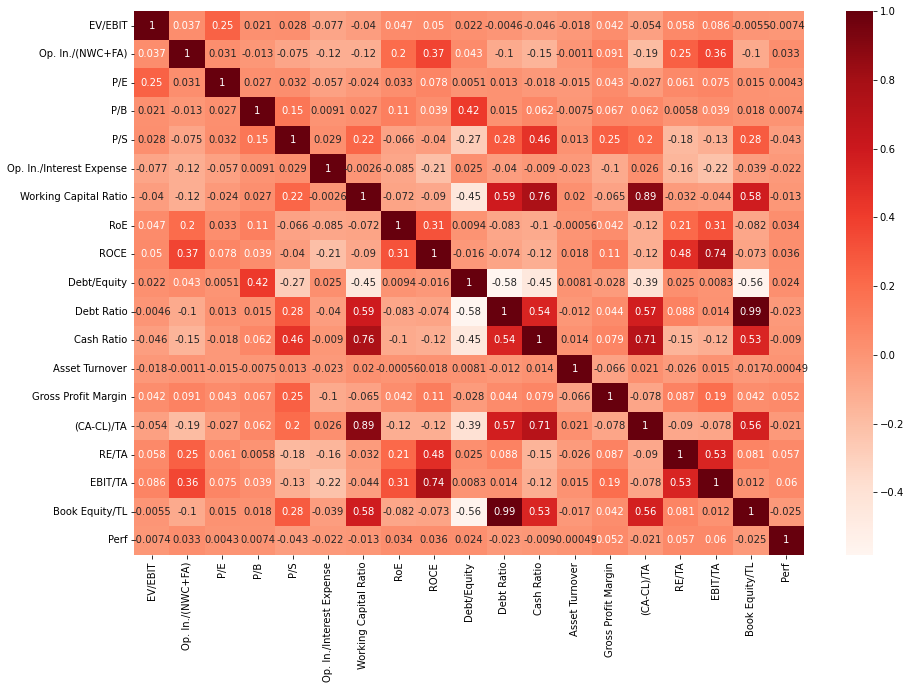

In [16]:
#Using Pearson Correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = x_t.columns[columns]
data = x_t[selected_columns]

In [18]:
data

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Perf
0,-0.111867,0.131299,-0.092956,-0.121411,-0.495570,0.428984,0.303209,0.281666,0.621688,0.541736,-0.442724,0.572833,-0.108188,0.686832,0.175533,0.471573,0.359862,1.111840
1,2.355120,-0.199498,-2.668638,0.026984,0.225964,0.034164,0.819106,-0.063969,-1.122831,0.699416,-0.556484,1.202821,-0.120041,0.534547,0.588574,0.397270,-0.260341,0.573270
2,0.062577,-0.052973,0.008725,0.053891,0.347152,0.073755,0.059199,0.208555,0.350177,0.683526,-0.545360,0.360050,-0.118262,0.631846,0.380757,0.382218,0.127405,-0.546977
3,-0.093114,0.048214,-0.068360,-0.090291,0.002306,0.114393,0.621135,0.236942,0.685420,0.063946,-0.047928,1.088751,-0.111154,0.614770,0.738201,0.678313,0.385827,0.242631
4,-0.047498,0.119398,-0.063238,-0.091349,0.140148,0.099811,0.332868,0.222065,0.496876,-0.000403,0.011630,0.708324,-0.115902,0.585844,0.157959,0.749390,0.298012,0.641033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.240063,-1.010213,-0.184328,-0.227983,2.335179,0.251855,1.616390,-0.868335,-1.319848,-1.379625,1.797294,1.779170,-0.159107,-1.767728,2.419697,-1.416736,-2.296170,-0.829410
18516,-0.239172,-0.733772,-0.188936,-0.248978,2.335179,0.154545,1.667409,-0.568169,-1.319848,-1.400212,1.833308,1.757352,-0.161183,-1.767728,2.437122,-1.404703,-1.775553,0.396649
18517,0.034841,2.149415,0.025021,2.550836,1.168115,0.066482,0.111397,1.845467,2.480940,-0.230777,0.238900,0.805948,0.510956,1.486036,1.022663,-0.535690,10.667886,-0.173397
18518,0.030158,1.292322,0.002261,1.442070,1.046310,0.372538,0.093198,1.233700,2.343180,0.038748,-0.024801,0.849349,0.082544,1.536675,0.620978,0.184170,3.977933,1.683839


In [19]:
data.drop('Perf', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
data

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA
0,-0.111867,0.131299,-0.092956,-0.121411,-0.495570,0.428984,0.303209,0.281666,0.621688,0.541736,-0.442724,0.572833,-0.108188,0.686832,0.175533,0.471573,0.359862
1,2.355120,-0.199498,-2.668638,0.026984,0.225964,0.034164,0.819106,-0.063969,-1.122831,0.699416,-0.556484,1.202821,-0.120041,0.534547,0.588574,0.397270,-0.260341
2,0.062577,-0.052973,0.008725,0.053891,0.347152,0.073755,0.059199,0.208555,0.350177,0.683526,-0.545360,0.360050,-0.118262,0.631846,0.380757,0.382218,0.127405
3,-0.093114,0.048214,-0.068360,-0.090291,0.002306,0.114393,0.621135,0.236942,0.685420,0.063946,-0.047928,1.088751,-0.111154,0.614770,0.738201,0.678313,0.385827
4,-0.047498,0.119398,-0.063238,-0.091349,0.140148,0.099811,0.332868,0.222065,0.496876,-0.000403,0.011630,0.708324,-0.115902,0.585844,0.157959,0.749390,0.298012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.240063,-1.010213,-0.184328,-0.227983,2.335179,0.251855,1.616390,-0.868335,-1.319848,-1.379625,1.797294,1.779170,-0.159107,-1.767728,2.419697,-1.416736,-2.296170
18516,-0.239172,-0.733772,-0.188936,-0.248978,2.335179,0.154545,1.667409,-0.568169,-1.319848,-1.400212,1.833308,1.757352,-0.161183,-1.767728,2.437122,-1.404703,-1.775553
18517,0.034841,2.149415,0.025021,2.550836,1.168115,0.066482,0.111397,1.845467,2.480940,-0.230777,0.238900,0.805948,0.510956,1.486036,1.022663,-0.535690,10.667886
18518,0.030158,1.292322,0.002261,1.442070,1.046310,0.372538,0.093198,1.233700,2.343180,0.038748,-0.024801,0.849349,0.082544,1.536675,0.620978,0.184170,3.977933


In [21]:
import statsmodels.api as sm

In [22]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     11.40
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           7.88e-32
Time:                        16:14:14   Log-Likelihood:                -26182.
No. Observations:               18520   AIC:                         5.240e+04
Df Residuals:                   18502   BIC:                         5.254e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
EV/EBIT                     -0.0136      0.008     -1.783      0.075      -0.028       0.001
Op. In./(NWC+FA)             0.0072      0.008      0.893      0.372      -0.009       0.023
P/E                          0.0036      0.008      0.471      0.638      -0.011       0.018
P/B                          0.0061      0.009      0.664      0.507      -0.012       0.024
P/S                         -0.0547      0.009     -5.957      0.000      -0.073      -0.037
Op. In./Interest Expense    -0.0051      0.008     -0.674      0.501      -0.020       0.010
Working Capital Ratio        0.0061      0.018      0.331      0.741      -0.030       0.042
RoE                          0.0140      0.008      1.761      0.078      -0.002       0.030
ROCE                        -0.0247      0.012     -2.122      0.034      -0.048      -0.002
Debt/Equity                  0.0066      0.012      0.574      0.566      -0.016       0.029
Debt Ratio                  -0.0282      0.011     -2.543      0.011      -0.050      -0.006
Cash Ratio                   0.0496      0.013      3.763      0.000       0.024       0.075
Asset Turnover               0.0035      0.007      0.482      0.630      -0.011       0.018
Gross Profit Margin          0.0529      0.008      6.645      0.000       0.037       0.069
(CA-CL)/TA                  -0.0220      0.017     -1.327      0.184      -0.055       0.011
RE/TA                        0.0368      0.009      3.995      0.000       0.019       0.055
EBIT/TA                      0.0390      0.012      3.247      0.001       0.015       0.062
==============================================================================
Omnibus:                     1093.906   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4663.032
Skew:                          -0.088   Prob(JB):                         0.00
Kurtosis:                       5.452   Cond. No.                         6.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
data.drop('Working Capital Ratio', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     12.10
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.33e-32
Time:                        16:14:42   Log-Likelihood:                -26182.
No. Observations:               18520   AIC:                         5.240e+04
Df Residuals:                   18503   BIC:                         5.253e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
EV/EBIT                     -0.0135      0.008     -1.777      0.076      -0.028       0.001
Op. In./(NWC+FA)             0.0075      0.008      0.922      0.356      -0.008       0.023
P/E                          0.0035      0.008      0.467      0.641      -0.011       0.018
P/B                          0.0061      0.009      0.659      0.510      -0.012       0.024
P/S                         -0.0549      0.009     -6.004      0.000      -0.073      -0.037
Op. In./Interest Expense    -0.0051      0.008     -0.676      0.499      -0.020       0.010
RoE                          0.0142      0.008      1.784      0.074      -0.001       0.030
ROCE                        -0.0248      0.012     -2.134      0.033      -0.048      -0.002
Debt/Equity                  0.0064      0.012      0.553      0.580      -0.016       0.029
Debt Ratio                  -0.0279      0.011     -2.524      0.012      -0.049      -0.006
Cash Ratio                   0.0513      0.012      4.265      0.000       0.028       0.075
Asset Turnover               0.0036      0.007      0.484      0.628      -0.011       0.018
Gross Profit Margin          0.0527      0.008      6.642      0.000       0.037       0.068
(CA-CL)/TA                  -0.0181      0.011     -1.576      0.115      -0.041       0.004
RE/TA                        0.0371      0.009      4.056      0.000       0.019       0.055
EBIT/TA                      0.0390      0.012      3.252      0.001       0.015       0.063
==============================================================================
Omnibus:                     1093.846   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4662.015
Skew:                          -0.089   Prob(JB):                         0.00
Kurtosis:                       5.452   Cond. No.                         3.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
data.drop('P/E', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     12.90
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           7.03e-33
Time:                        16:14:55   Log-Likelihood:                -26182.
No. Observations:               18520   AIC:                         5.240e+04
Df Residuals:                   18504   BIC:                         5.252e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
EV/EBIT                     -0.0127      0.007     -1.715      0.086      -0.027       0.002
Op. In./(NWC+FA)             0.0074      0.008      0.920      0.358      -0.008       0.023
P/B                          0.0061      0.009      0.664      0.506      -0.012       0.024
P/S                         -0.0548      0.009     -5.994      0.000      -0.073      -0.037
Op. In./Interest Expense    -0.0052      0.008     -0.688      0.491      -0.020       0.010
RoE                          0.0142      0.008      1.784      0.074      -0.001       0.030
ROCE                        -0.0246      0.012     -2.120      0.034      -0.047      -0.002
Debt/Equity                  0.0064      0.012      0.555      0.579      -0.016       0.029
Debt Ratio                  -0.0278      0.011     -2.517      0.012      -0.049      -0.006
Cash Ratio                   0.0513      0.012      4.260      0.000       0.028       0.075
Asset Turnover               0.0035      0.007      0.479      0.632      -0.011       0.018
Gross Profit Margin          0.0527      0.008      6.648      0.000       0.037       0.068
(CA-CL)/TA                  -0.0181      0.011     -1.579      0.114      -0.041       0.004
RE/TA                        0.0372      0.009      4.063      0.000       0.019       0.055
EBIT/TA                      0.0390      0.012      3.253      0.001       0.016       0.063
==============================================================================
Omnibus:                     1093.816   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4660.683
Skew:                          -0.089   Prob(JB):                         0.00
Kurtosis:                       5.451   Cond. No.                         3.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
data.drop('Asset Turnover', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     13.80
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.06e-33
Time:                        16:15:17   Log-Likelihood:                -26183.
No. Observations:               18520   AIC:                         5.240e+04
Df Residuals:                   18505   BIC:                         5.251e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
EV/EBIT                     -0.0127      0.007     -1.724      0.085      -0.027       0.002
Op. In./(NWC+FA)             0.0074      0.008      0.919      0.358      -0.008       0.023
P/B                          0.0060      0.009      0.654      0.513      -0.012       0.024
P/S                         -0.0547      0.009     -5.981      0.000      -0.073      -0.037
Op. In./Interest Expense    -0.0053      0.008     -0.702      0.483      -0.020       0.010
RoE                          0.0142      0.008      1.784      0.074      -0.001       0.030
ROCE                        -0.0246      0.012     -2.116      0.034      -0.047      -0.002
Debt/Equity                  0.0065      0.012      0.566      0.571      -0.016       0.029
Debt Ratio                  -0.0278      0.011     -2.522      0.012      -0.049      -0.006
Cash Ratio                   0.0513      0.012      4.262      0.000       0.028       0.075
Gross Profit Margin          0.0524      0.008      6.631      0.000       0.037       0.068
(CA-CL)/TA                  -0.0180      0.011     -1.571      0.116      -0.040       0.004
RE/TA                        0.0370      0.009      4.049      0.000       0.019       0.055
EBIT/TA                      0.0392      0.012      3.269      0.001       0.016       0.063
==============================================================================
Omnibus:                     1093.823   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4660.718
Skew:                          -0.089   Prob(JB):                         0.00
Kurtosis:                       5.451   Cond. No.                         3.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
data.drop('Debt/Equity', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     14.84
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           6.06e-34
Time:                        16:15:27   Log-Likelihood:                -26183.
No. Observations:               18520   AIC:                         5.239e+04
Df Residuals:                   18506   BIC:                         5.250e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
EV/EBIT                     -0.0127      0.007     -1.718      0.086      -0.027       0.002
Op. In./(NWC+FA)             0.0074      0.008      0.913      0.361      -0.008       0.023
P/B                          0.0091      0.007      1.215      0.224      -0.006       0.024
P/S                         -0.0555      0.009     -6.153      0.000      -0.073      -0.038
Op. In./Interest Expense    -0.0054      0.008     -0.710      0.478      -0.020       0.009
RoE                          0.0136      0.008      1.721      0.085      -0.002       0.029
ROCE                        -0.0256      0.012     -2.221      0.026      -0.048      -0.003
Debt Ratio                  -0.0309      0.010     -3.234      0.001      -0.050      -0.012
Cash Ratio                   0.0503      0.012      4.225      0.000       0.027       0.074
Gross Profit Margin          0.0525      0.008      6.637      0.000       0.037       0.068
(CA-CL)/TA                  -0.0182      0.011     -1.591      0.112      -0.041       0.004
RE/TA                        0.0375      0.009      4.122      0.000       0.020       0.055
EBIT/TA                      0.0396      0.012      3.304      0.001       0.016       0.063
==============================================================================
Omnibus:                     1094.097   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4655.451
Skew:                          -0.091   Prob(JB):                         0.00
Kurtosis:                       5.449   Cond. No.                         3.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
data.drop('Op. In./Interest Expense', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     16.03
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.87e-34
Time:                        16:15:30   Log-Likelihood:                -26183.
No. Observations:               18520   AIC:                         5.239e+04
Df Residuals:                   18507   BIC:                         5.249e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
EV/EBIT                -0.0124      0.007     -1.677      0.094      -0.027       0.002
Op. In./(NWC+FA)        0.0075      0.008      0.934      0.350      -0.008       0.023
P/B                     0.0090      0.007      1.204      0.229      -0.006       0.024
P/S                    -0.0558      0.009     -6.199      0.000      -0.073      -0.038
RoE                     0.0136      0.008      1.727      0.084      -0.002       0.029
ROCE                   -0.0250      0.011     -2.178      0.029      -0.047      -0.002
Debt Ratio             -0.0307      0.010     -3.207      0.001      -0.049      -0.012
Cash Ratio              0.0508      0.012      4.273      0.000       0.027       0.074
Gross Profit Margin     0.0528      0.008      6.694      0.000       0.037       0.068
(CA-CL)/TA             -0.0186      0.011     -1.624      0.104      -0.041       0.004
RE/TA                   0.0377      0.009      4.143      0.000       0.020       0.056
EBIT/TA                 0.0400      0.012      3.350      0.001       0.017       0.063
==============================================================================
Omnibus:                     1093.644   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4651.827
Skew:                          -0.091   Prob(JB):                         0.00
Kurtosis:                       5.449   Cond. No.                         3.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
data.drop('Op. In./(NWC+FA)', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     17.41
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           6.59e-35
Time:                        16:15:32   Log-Likelihood:                -26183.
No. Observations:               18520   AIC:                         5.239e+04
Df Residuals:                   18508   BIC:                         5.248e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
EV/EBIT                -0.0124      0.007     -1.677      0.094      -0.027       0.002
P/B                     0.0088      0.007      1.178      0.239      -0.006       0.023
P/S                    -0.0559      0.009     -6.208      0.000      -0.074      -0.038
RoE                     0.0141      0.008      1.796      0.073      -0.001       0.030
ROCE                   -0.0237      0.011     -2.079      0.038      -0.046      -0.001
Debt Ratio             -0.0308      0.010     -3.224      0.001      -0.050      -0.012
Cash Ratio              0.0509      0.012      4.283      0.000       0.028       0.074
Gross Profit Margin     0.0530      0.008      6.721      0.000       0.038       0.068
(CA-CL)/TA             -0.0196      0.011     -1.720      0.086      -0.042       0.003
RE/TA                   0.0381      0.009      4.188      0.000       0.020       0.056
EBIT/TA                 0.0414      0.012      3.484      0.000       0.018       0.065
==============================================================================
Omnibus:                     1093.483   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4648.550
Skew:                          -0.091   Prob(JB):                         0.00
Kurtosis:                       5.448   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
data.drop('P/B', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     19.02
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.84e-35
Time:                        16:15:34   Log-Likelihood:                -26184.
No. Observations:               18520   AIC:                         5.239e+04
Df Residuals:                   18509   BIC:                         5.248e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
EV/EBIT                -0.0123      0.007     -1.664      0.096      -0.027       0.002
P/S                    -0.0543      0.009     -6.100      0.000      -0.072      -0.037
RoE                     0.0151      0.008      1.937      0.053      -0.000       0.030
ROCE                   -0.0239      0.011     -2.094      0.036      -0.046      -0.002
Debt Ratio             -0.0314      0.010     -3.293      0.001      -0.050      -0.013
Cash Ratio              0.0504      0.012      4.243      0.000       0.027       0.074
Gross Profit Margin     0.0533      0.008      6.756      0.000       0.038       0.069
(CA-CL)/TA             -0.0185      0.011     -1.629      0.103      -0.041       0.004
RE/TA                   0.0381      0.009      4.198      0.000       0.020       0.056
EBIT/TA                 0.0416      0.012      3.508      0.000       0.018       0.065
==============================================================================
Omnibus:                     1092.407   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4642.944
Skew:                          -0.090   Prob(JB):                         0.00
Kurtosis:                       5.446   Cond. No.                         3.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
data.drop('(CA-CL)/TA', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     20.83
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           2.15e-35
Time:                        16:15:36   Log-Likelihood:                -26185.
No. Observations:               18520   AIC:                         5.239e+04
Df Residuals:                   18510   BIC:                         5.247e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
EV/EBIT                -0.0120      0.007     -1.629      0.103      -0.026       0.002
P/S                    -0.0517      0.009     -5.902      0.000      -0.069      -0.035
RoE                     0.0158      0.008      2.026      0.043       0.001       0.031
ROCE                   -0.0235      0.011     -2.060      0.039      -0.046      -0.001
Debt Ratio             -0.0365      0.009     -4.053      0.000      -0.054      -0.019
Cash Ratio              0.0388      0.010      4.076      0.000       0.020       0.058
Gross Profit Margin     0.0552      0.008      7.080      0.000       0.040       0.070
RE/TA                   0.0389      0.009      4.284      0.000       0.021       0.057
EBIT/TA                 0.0408      0.012      3.443      0.001       0.018       0.064
==============================================================================
Omnibus:                     1094.081   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4648.590
Skew:                          -0.092   Prob(JB):                         0.00
Kurtosis:                       5.447   Cond. No.                         3.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
data.drop('EV/EBIT', axis=1, inplace=True)

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(data)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     23.10
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.54e-35
Time:                        16:15:39   Log-Likelihood:                -26187.
No. Observations:               18520   AIC:                         5.239e+04
Df Residuals:                   18511   BIC:                         5.246e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
P/S                    -0.0526      0.009     -6.012      0.000      -0.070      -0.035
RoE                     0.0155      0.008      1.989      0.047       0.000       0.031
ROCE                   -0.0228      0.011     -2.006      0.045      -0.045      -0.001
Debt Ratio             -0.0366      0.009     -4.064      0.000      -0.054      -0.019
Cash Ratio              0.0397      0.010      4.174      0.000       0.021       0.058
Gross Profit Margin     0.0550      0.008      7.061      0.000       0.040       0.070
RE/TA                   0.0386      0.009      4.254      0.000       0.021       0.056
EBIT/TA                 0.0396      0.012      3.346      0.001       0.016       0.063
==============================================================================
Omnibus:                     1093.577   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4649.075
Skew:                          -0.091   Prob(JB):                         0.00
Kurtosis:                       5.448   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
data.to_csv("Annual_Stock_Price_Fundamentals_Ratios_Metodo_Envoltura.csv")

In [42]:
data

,P/S,RoE,ROCE,Debt Ratio,Cash Ratio,Gross Profit Margin,RE/TA,EBIT/TA
0,-0.495570,0.281666,0.621688,-0.442724,0.572833,0.686832,0.471573,0.359862
1,0.225964,-0.063969,-1.122831,-0.556484,1.202821,0.534547,0.397270,-0.260341
2,0.347152,0.208555,0.350177,-0.545360,0.360050,0.631846,0.382218,0.127405
3,0.002306,0.236942,0.685420,-0.047928,1.088751,0.614770,0.678313,0.385827
4,0.140148,0.222065,0.496876,0.011630,0.708324,0.585844,0.749390,0.298012
...,...,...,...,...,...,...,...,...
18515,2.335179,-0.868335,-1.319848,1.797294,1.779170,-1.767728,-1.416736,-2.296170
18516,2.335179,-0.568169,-1.319848,1.833308,1.757352,-1.767728,-1.404703,-1.775553
18517,1.168115,1.845467,2.480940,0.238900,0.805948,1.486036,-0.535690,10.667886
18518,1.046310,1.233700,2.343180,-0.024801,0.849349,1.536675,0.184170,3.977933


In [43]:
datamasperf = data.join(y_t)

In [44]:
datamasperf

,P/S,RoE,ROCE,Debt Ratio,Cash Ratio,Gross Profit Margin,RE/TA,EBIT/TA,Perf
0,-0.495570,0.281666,0.621688,-0.442724,0.572833,0.686832,0.471573,0.359862,1.111840
1,0.225964,-0.063969,-1.122831,-0.556484,1.202821,0.534547,0.397270,-0.260341,0.573270
2,0.347152,0.208555,0.350177,-0.545360,0.360050,0.631846,0.382218,0.127405,-0.546977
3,0.002306,0.236942,0.685420,-0.047928,1.088751,0.614770,0.678313,0.385827,0.242631
4,0.140148,0.222065,0.496876,0.011630,0.708324,0.585844,0.749390,0.298012,0.641033
...,...,...,...,...,...,...,...,...,...
18515,2.335179,-0.868335,-1.319848,1.797294,1.779170,-1.767728,-1.416736,-2.296170,-0.829410
18516,2.335179,-0.568169,-1.319848,1.833308,1.757352,-1.767728,-1.404703,-1.775553,0.396649
18517,1.168115,1.845467,2.480940,0.238900,0.805948,1.486036,-0.535690,10.667886,-0.173397
18518,1.046310,1.233700,2.343180,-0.024801,0.849349,1.536675,0.184170,3.977933,1.683839


In [46]:
import matplotlib.ticker as ticker

IndexError: index 8 is out of bounds for axis 0 with size 8

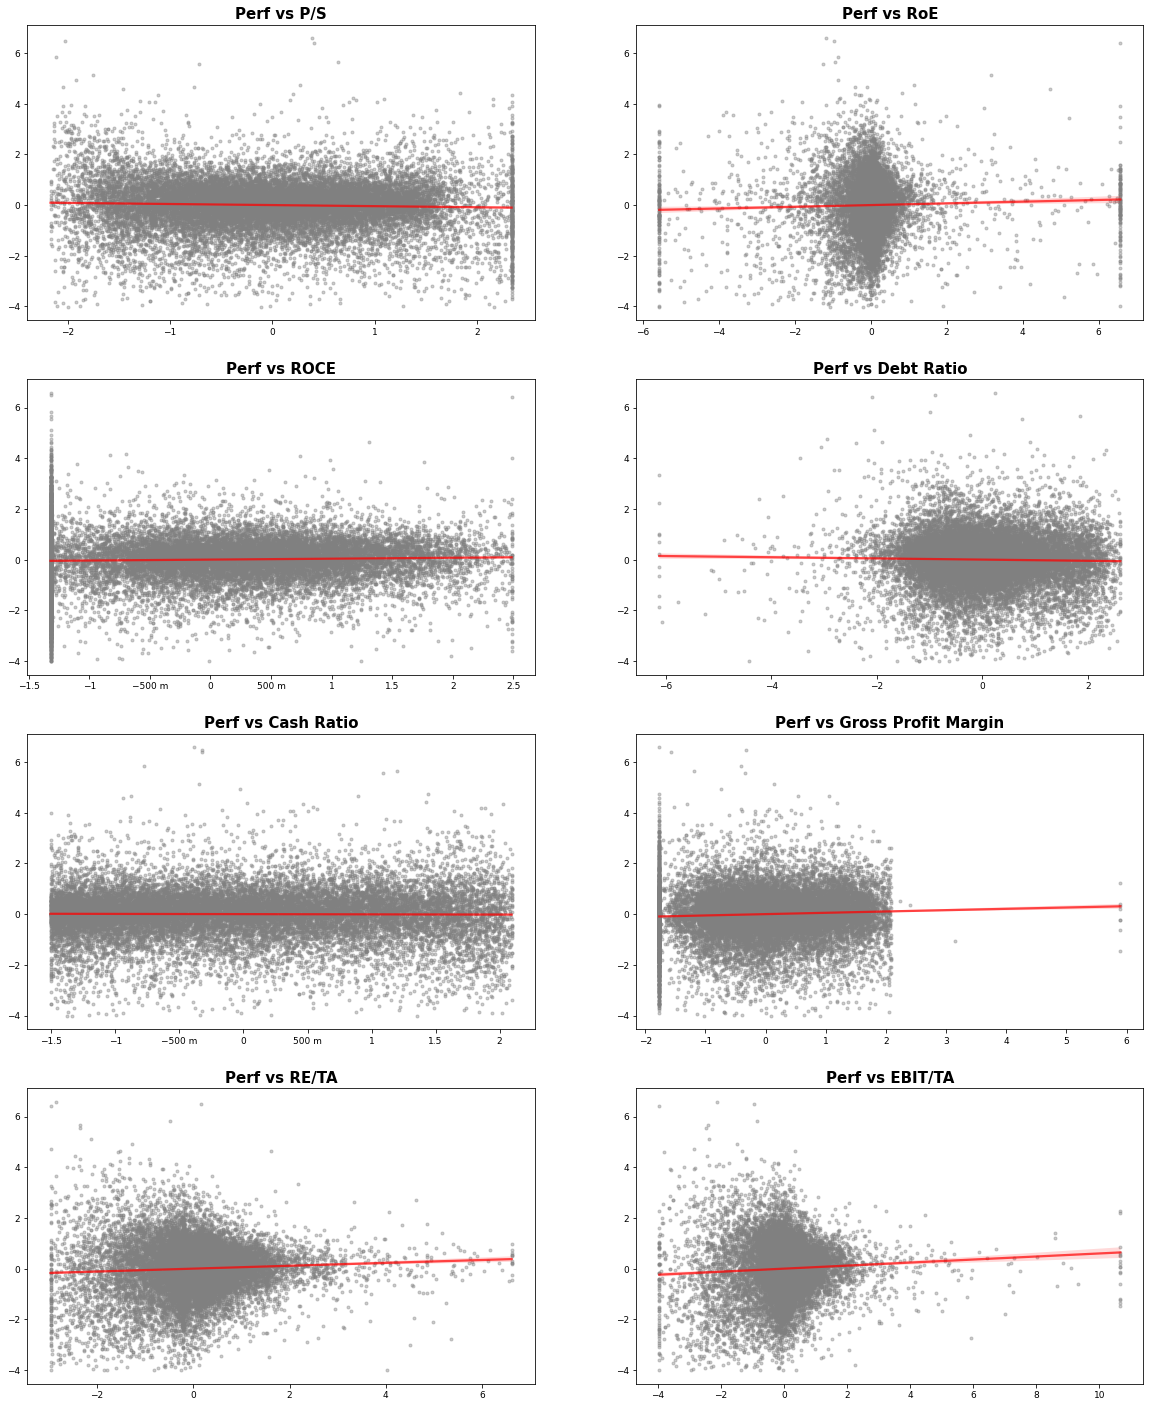

In [47]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))
axes = axes.flat
columnas_numeric = datamasperf.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Perf')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datamasperf[colum],
        y           = datamasperf['Perf'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Perf vs {colum}", fontsize = 15, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    plt.savefig('corrxygraph.png')

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Perf', fontsize = 10, fontweight = "bold");

In [48]:
x

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,1.074436,7.007282,0.553516,0.264307,0.398316,0.117739,0.575315
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,2.219947,5.302959,0.511493,0.372832,0.362585,0.008671,0.493135
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,0.859228,5.555102,0.538207,0.318276,0.355198,0.079208,0.500929
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,1.919978,6.575547,0.533485,0.412057,0.491995,0.121895,0.910356
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,1.241944,5.891753,0.525518,0.259681,0.522494,0.107726,0.968978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,6.144881,0.231206,0.000000,0.850020,-1.751025,-0.607070,5.922574
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,5.810440,0.000000,0.000000,0.854534,-1.718639,-0.392706,6.212825
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,1.381922,124.638298,0.794341,0.486505,-0.270019,1.000000,1.217283
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,1.450379,38.970696,0.810822,0.381331,0.252662,0.538673,0.932831


In [50]:
list(data.columns.values)

['P/S',
 'RoE',
 'ROCE',
 'Debt Ratio',
 'Cash Ratio',
 'Gross Profit Margin',
 'RE/TA',
 'EBIT/TA']

In [51]:
x_envol = x.filter(['P/S',
 'RoE',
 'ROCE',
 'Debt Ratio',
 'Cash Ratio',
 'Gross Profit Margin',
 'RE/TA',
 'EBIT/TA'], axis=1)

In [52]:
x_envol

,P/S,RoE,ROCE,Debt Ratio,Cash Ratio,Gross Profit Margin,RE/TA,EBIT/TA
0,1.078175,0.270809,0.145323,1.575315,1.074436,0.553516,0.398316,0.117739
1,2.285561,-0.012331,0.010171,1.493135,2.219947,0.511493,0.362585,0.008671
2,2.600165,0.211372,0.116135,1.500929,0.859228,0.538207,0.355198,0.079208
3,1.810151,0.234476,0.152909,1.910356,1.919978,0.533485,0.491995,0.121895
4,2.088763,0.222372,0.131320,1.968978,1.241944,0.525518,0.522494,0.107726
...,...,...,...,...,...,...,...,...
18515,500.000000,-0.692882,0.000000,6.922574,6.144881,0.000000,-1.751025,-0.607070
18516,500.000000,-0.435780,0.000000,7.212825,5.810440,0.000000,-1.718639,-0.392706
18517,7.090559,1.502448,1.824561,2.217283,1.381922,0.794341,-0.270019,1.000000
18518,5.971951,1.028092,0.845289,1.932831,1.450379,0.810822,0.252662,0.538673


In [53]:
x

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,1.074436,7.007282,0.553516,0.264307,0.398316,0.117739,0.575315
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,2.219947,5.302959,0.511493,0.372832,0.362585,0.008671,0.493135
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,0.859228,5.555102,0.538207,0.318276,0.355198,0.079208,0.500929
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,1.919978,6.575547,0.533485,0.412057,0.491995,0.121895,0.910356
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,1.241944,5.891753,0.525518,0.259681,0.522494,0.107726,0.968978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,6.144881,0.231206,0.000000,0.850020,-1.751025,-0.607070,5.922574
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,5.810440,0.000000,0.000000,0.854534,-1.718639,-0.392706,6.212825
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,1.381922,124.638298,0.794341,0.486505,-0.270019,1.000000,1.217283
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,1.450379,38.970696,0.810822,0.381331,0.252662,0.538673,0.932831


In [54]:
data

,P/S,RoE,ROCE,Debt Ratio,Cash Ratio,Gross Profit Margin,RE/TA,EBIT/TA
0,-0.495570,0.281666,0.621688,-0.442724,0.572833,0.686832,0.471573,0.359862
1,0.225964,-0.063969,-1.122831,-0.556484,1.202821,0.534547,0.397270,-0.260341
2,0.347152,0.208555,0.350177,-0.545360,0.360050,0.631846,0.382218,0.127405
3,0.002306,0.236942,0.685420,-0.047928,1.088751,0.614770,0.678313,0.385827
4,0.140148,0.222065,0.496876,0.011630,0.708324,0.585844,0.749390,0.298012
...,...,...,...,...,...,...,...,...
18515,2.335179,-0.868335,-1.319848,1.797294,1.779170,-1.767728,-1.416736,-2.296170
18516,2.335179,-0.568169,-1.319848,1.833308,1.757352,-1.767728,-1.404703,-1.775553
18517,1.168115,1.845467,2.480940,0.238900,0.805948,1.486036,-0.535690,10.667886
18518,1.046310,1.233700,2.343180,-0.024801,0.849349,1.536675,0.184170,3.977933


In [55]:
x_envol.to_csv("Annual_Stock_Price_Fundamentals_Ratios_Metodo_Envoltura.csv")

In [56]:
x_envol

,P/S,RoE,ROCE,Debt Ratio,Cash Ratio,Gross Profit Margin,RE/TA,EBIT/TA
0,1.078175,0.270809,0.145323,1.575315,1.074436,0.553516,0.398316,0.117739
1,2.285561,-0.012331,0.010171,1.493135,2.219947,0.511493,0.362585,0.008671
2,2.600165,0.211372,0.116135,1.500929,0.859228,0.538207,0.355198,0.079208
3,1.810151,0.234476,0.152909,1.910356,1.919978,0.533485,0.491995,0.121895
4,2.088763,0.222372,0.131320,1.968978,1.241944,0.525518,0.522494,0.107726
...,...,...,...,...,...,...,...,...
18515,500.000000,-0.692882,0.000000,6.922574,6.144881,0.000000,-1.751025,-0.607070
18516,500.000000,-0.435780,0.000000,7.212825,5.810440,0.000000,-1.718639,-0.392706
18517,7.090559,1.502448,1.824561,2.217283,1.381922,0.794341,-0.270019,1.000000
18518,5.971951,1.028092,0.845289,1.932831,1.450379,0.810822,0.252662,0.538673


In [8]:
y

,Ticker,Perf
0,A,0.764005
1,A,0.373311
2,A,-0.152369
3,A,0.185295
4,A,0.416215
...,...,...
18515,ZYNE,-0.247917
18516,ZYNE,0.268698
18517,ZYXI,-0.008791
18518,ZYXI,1.337917


In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
from pandas.plotting import scatter_matrix

x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios_Metodo_Envoltura.csv", index_col=0)
y=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)
y=y["Perf"]

In [2]:
x

,P/B,P/S,RoE,Debt/Equity,Debt Ratio,RE/TA,EBIT/TA
0,2.432739,1.078175,0.270809,1.738179,1.575315,0.398316,0.117739
1,4.073827,2.285561,-0.012331,2.027844,1.493135,0.362585,0.008671
2,4.374320,2.600165,0.211372,1.996292,1.500929,0.355198,0.079208
3,2.774363,1.810151,0.234476,1.098471,1.910356,0.491995,0.121895
4,2.762727,2.088763,0.222372,1.032015,1.968978,0.522494,0.107726
...,...,...,...,...,...,...,...
18515,1.275704,500.000000,-0.692882,0.168846,6.922574,-1.751025,-0.607070
18516,1.050584,500.000000,-0.435780,0.160957,7.212825,-1.718639,-0.392706
18517,33.893509,7.090559,1.502448,0.821501,2.217283,-0.270019,1.000000
18518,20.515204,5.971951,1.028092,1.072005,1.932831,0.252662,0.538673


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5)
print('X training matrix dimensions: ', X_train.shape)
print('X testing matrix dimensions: ', X_test.shape)
print('y training matrix dimensions: ', y_train.shape)
print('y testing matrix dimensions: ', y_test.shape)

# Save CSVs incase want to see the data.
X_train.to_csv("Annual_Stock_Price_Fundamentals_Ratios_train_filtered.csv")
X_test.to_csv("Annual_Stock_Price_Fundamentals_Ratios_test_filtered.csv")
y_train.to_csv("Annual_Stock_Price_Performance_Percentage_train_filtered.csv")
y_test.to_csv("Annual_Stock_Price_Performance_Percentage_test_filtered.csv")

X training matrix dimensions:  (16668, 7)
X testing matrix dimensions:  (1852, 7)
y training matrix dimensions:  (16668,)
y testing matrix dimensions:  (1852,)


### LINEAR

In [5]:
# Linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

pl_linear = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('linear', LinearRegression())
])
pl_linear.fit(X_train, y_train)
y_pred = pl_linear.predict(X_test)
print('train mse: ', mean_squared_error(y_train, pl_linear.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))
print('train rmse: ', mean_squared_error(y_train, pl_linear.predict(X_train), squared = False))
print('test rmse: ', mean_squared_error(y_test, y_pred, squared = False))
print('Training set score:',  format(pl_linear.score(X_train, y_train)))
print('Test set score:', format(pl_linear.score(X_test, y_test)))

import pickle # To save the fitted model
pickle.dump(pl_linear, open("pl_linear.p", "wb" ))

train mse:  1.6397102868527973
test mse:  1.2572306392824026
train rmse:  1.280511728510441
test rmse:  1.1212629661602147
Training set score: 0.01030701553814617
Test set score: 0.00010573404263969355


In [34]:
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Try a few values of K, show results.
vals=[2,5,10,50,100,200]

for i in vals:
    scores = cross_validate(pl_linear, x, y, scoring='neg_mean_squared_error', cv=i, return_train_score=True)
    print('K=', i,'Segments')
    
    #print('Train scores',np.sqrt(-scores['train_score']))
    #print('Test scores',np.sqrt(-scores['test_score']))
    
    print('AVERAGE TEST SCORE:',\
          round(np.sqrt(-scores['test_score']).mean(),4),\
         'STD. DEV.:', round(np.sqrt(-scores['test_score']).std(),4))
    
    print('AVERAGE TRAIN SCORE:',\
          round(np.sqrt(-scores['train_score']).mean(),4),\
         'STD. DEV.:', round(np.sqrt(-scores['train_score']).std(),4))
    
    print('-----------------')

K= 2 Segments
AVERAGE TEST SCORE: 1.2599 STD. DEV.: 0.1491
AVERAGE TRAIN SCORE: 1.2551 STD. DEV.: 0.1492
-----------------
K= 5 Segments
AVERAGE TEST SCORE: 1.2026 STD. DEV.: 0.4021
AVERAGE TRAIN SCORE: 1.2614 STD. DEV.: 0.0926
-----------------
K= 10 Segments
AVERAGE TEST SCORE: 1.1535 STD. DEV.: 0.5248
AVERAGE TRAIN SCORE: 1.2633 STD. DEV.: 0.0645
-----------------
K= 50 Segments
AVERAGE TEST SCORE: 0.9781 STD. DEV.: 0.8059
AVERAGE TRAIN SCORE: 1.2647 STD. DEV.: 0.0303
-----------------
K= 100 Segments
AVERAGE TEST SCORE: 0.8998 STD. DEV.: 0.8929
AVERAGE TRAIN SCORE: 1.2649 STD. DEV.: 0.0218
-----------------
K= 200 Segments
AVERAGE TEST SCORE: 0.8241 STD. DEV.: 0.9622
AVERAGE TRAIN SCORE: 1.265 STD. DEV.: 0.0156
-----------------


In [6]:
# Output scatter plot and contour plot of density of points to see if prediciton matches reality
# Line of x=y is provided, perfect prediction would have all density on this line
# Also plot linear regression of the scatter

# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plotDensityContourPredVsReal(model_name, x_plot, y_plot, ps):
    # Plotting scatter 
    plt.scatter(x_plot, y_plot, s=1)
    # Plotting linear regression
    # Swap X and Y fit because prediction is quite centered around one value.
    LinMod = LinearRegression().fit(y_plot.reshape(-1, 1), x_plot.reshape(-1, 1))
    xx=[[-5],[5]]
    yy=LinMod.predict(xx)
    plt.plot(yy,xx,'g')
    # Plot formatting
    plt.grid()
    plt.axhline(y=0, color='r', label='_nolegend_')
    plt.axvline(x=0, color='r', label='_nolegend_')
    plt.xlabel('Retorno estimado')
    plt.ylabel('Retorno real')
    plt.plot([-100,100],[-100,100],'y--')
    plt.xlim([-ps,ps])
    plt.ylim([-ps,ps])
    plt.title('Dispercion entre retorno estimado y real  {}'.format(model_name))
    plt.legend(['Linea de ajuste lineal','y=x Linea de estimación perfecta','Puntos de predicción'])

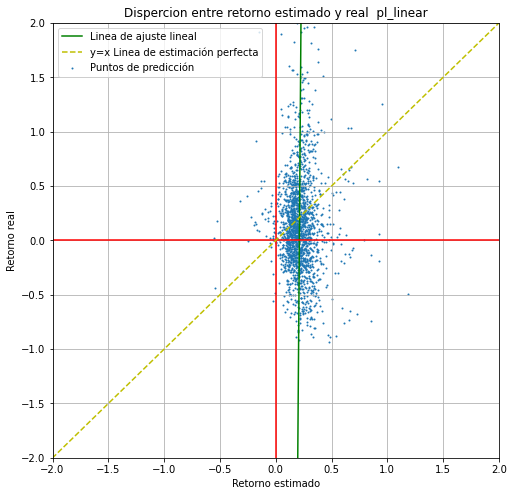

In [7]:
plt.figure(figsize=(8,8))
plotDensityContourPredVsReal('pl_linear', y_pred, y_test.to_numpy(), 2)

In [8]:
# See top 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_top10 = (y_predtest[0] > y_predtest.nlargest(10,0).tail(1)[0].values[0]) # Top 10 predicted returns
y_test_reindexed=y_test.reset_index(drop=True)

print('Predicted Returns:',y_predtest[bl_top10][0].values)
print('Actual Returns:', y_test_reindexed[bl_top10].values)
print('Top 10 Predicted Returns:', round( np.mean(y_predtest[bl_top10][0])*100,2 ), '%','\n')
print('Actual Top 10 Returns:', round( np.mean(y_test_reindexed[bl_top10])*100,2 ), '%')

Predicted Returns: [0.92890993 1.09361184 1.18468358 0.85481632 0.92687006 0.82136146
 0.94843936 0.85422323 0.92271156]
Actual Returns: [-0.19148936  0.67364017 -0.49180328 -0.13697524  0.05764706  0.56435644
  1.25       -0.74330357  0.54654655]
Top 10 Predicted Returns: 94.84 % 

Actual Top 10 Returns: 16.98 %


In [9]:
# See bottom 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_bottom10 = (y_predtest[0] < y_predtest.nsmallest(10,0).tail(1)[0].values[0])

#print('Returns:',y_predtest[bl_bottom10][0].values)
#print('Returns:',y_test_reindexed[bl_bottom10].values)
print('Bottom 10 Predicted Returns:', round( np.mean(y_predtest[bl_bottom10][0])*100,2 ), '%','\n')
print('Actual Bottom 10 Returns:', round( np.mean(y_test_reindexed[bl_bottom10])*100,2 ), '%')

Bottom 10 Predicted Returns: -37.99 % 

Actual Bottom 10 Returns: 27.78 %


In [10]:
# Create table of top10/bottom 10 averaged, 10 rows of 10 random_states.
def observePredictionAbility(my_pipeline):
    Top10PredRtrns=np.array([])
    Top10ActRtrns=np.array([])
    Bottom10PredRtrns=np.array([])
    Bottom10ActRtrns=np.array([])

    for i in range (0,10):
        
        X_train, X_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.1, random_state=i)
        
        my_pipeline.fit(X_train, y_train)
        y_pred = my_pipeline.predict(X_test)
        
        # See top 10 stocks and see how the values differ
        y_predtest=pd.DataFrame(y_pred)
        bl_top10 = \
        (y_predtest[0] > y_predtest.nlargest(10,0).tail(1)[0].values[0])
        
        y_test_reindexed=y_test.reset_index(drop=True)
        
        Top10PredRtrns = np.append(Top10PredRtrns,\
                round( np.mean(y_predtest[bl_top10][0])*100,2 ))
        Top10ActRtrns = np.append(Top10ActRtrns,\
                round( np.mean(y_test_reindexed[bl_top10])*100,2 ))
        
        # See bottom 10 stocks and see how the values differ
        y_predtest=pd.DataFrame(y_pred)
        bl_bottom10 =\
        (y_predtest[0] < y_predtest.nsmallest(10,0).tail(1)[0].values[0])
        
        #print('Returns:',y_predtest[bl_bottom10][0].values)
        Bottom10PredRtrns = np.append(Bottom10PredRtrns,\
                round( np.mean(y_predtest[bl_bottom10][0])*100,2 ))
        #print('Returns:',y_test_reindexed[bl_bottom10].values)
        Bottom10ActRtrns = np.append( Bottom10ActRtrns,\
                round(np.mean(y_test_reindexed[bl_bottom10])*100,2 ))

    
    print('Predicted Performance of Top 10 Return Portfolios:', Top10PredRtrns)
    print('Actual Performance of Top 10 Return Portfolios:', Top10ActRtrns,'\n')
    print('Predicted Performance of Bottom 10 Return Portfolios:', Bottom10PredRtrns)
    print('Actual Performance of Bottom 10 Return Portfolios:', Bottom10ActRtrns)
    
    print('--------------\n')
    
    print('Mean Predicted Std. Dev. of Top 10 Return Portfolios:',round(Top10PredRtrns.std(),2))
    print('Mean Actual Std. Dev. of Top 10 Return Portfolios:',round(Top10ActRtrns.std(),2))
    print('Mean Predicted Std. Dev. of Bottom 10 Return Portfolios:',round(Bottom10PredRtrns.std(),2))
    print('Mean Actual Std. Dev. of Bottom 10 Return Portfolios:',round(Bottom10ActRtrns.std(),2))

    print('--------------\n')
    #IMPORT PERFORMANCE MEASURES HERE
    print(\
      '\033[4mMean Predicted Performance of Top 10 Return Portfolios:\033[0m',\
          round(Top10PredRtrns.mean(),2))
    print(\
      '\033[4mMean Actual Performance of Top 10 Return Portfolios:\033[0m',\
          round(Top10ActRtrns.mean(),2))
    print('Mean Predicted Performance of Bottom 10 Return Portfolios:',\
          round(Bottom10PredRtrns.mean(),2))
    print('Mean Actual Performance of Bottom 10 Return Portfolios:',\
          round(Bottom10ActRtrns.mean(),2))

    print('--------------\n')
    
observePredictionAbility(pl_linear)

Predicted Performance of Top 10 Return Portfolios: [ 95.33  86.91  79.51  88.63 104.07  94.84  93.62  74.38  89.86  92.25]
Actual Performance of Top 10 Return Portfolios: [-10.21  10.21 126.87 -11.86  -9.12  16.98 -17.99  -8.45  25.94  14.43] 

Predicted Performance of Bottom 10 Return Portfolios: [-30.93 -30.96 -26.04 -37.49 -37.46 -37.99 -33.59 -20.09 -36.47 -38.84]
Actual Performance of Bottom 10 Return Portfolios: [ 2.94 18.31 13.87  0.28 18.24 27.78 29.72  0.6  39.65 56.48]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 7.96
Mean Actual Std. Dev. of Top 10 Return Portfolios: 40.28
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 5.79
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 17.22
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 89.94
Mean Actual Performance of Top 10 Return Portfolios: 13.68
Mean Predicted Performance of Bottom 10 Return Portfolios: -32.99
Mean Actual Performance of Bottom 10 Return Portfolios: 20.

# KNN

In [11]:
# KNeighbors regressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PowerTransformer
pl_KNeighbors = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=40))
])

pl_KNeighbors.fit(X_train, y_train)
y_pred = pl_KNeighbors.predict(X_test)
from sklearn.metrics import mean_squared_error
print('train mse: ', mean_squared_error(y_train, pl_KNeighbors.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))
print('train rmse: ', mean_squared_error(y_train, pl_KNeighbors.predict(X_train), squared = False))
print('test rmse: ', mean_squared_error(y_test, y_pred, squared = False))
print('Training set score:',  format(pl_KNeighbors.score(X_train, y_train)))
print('Test set score:', format(pl_KNeighbors.score(X_test, y_test)))

import pickle
pickle.dump(pl_KNeighbors, open("pl_KNeighbors.p", "wb" ))


train mse:  1.5808324894467627
test mse:  1.2232178640488638
train rmse:  1.257311611911209
test rmse:  1.1059918010766914
Training set score: 0.04584435618944016
Test set score: 0.02715660113312346


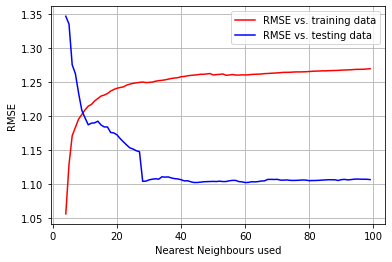

In [12]:
train_errors, test_errors, test_sizes=[], [], []

for i in range(4,100):
    pl_KNeighbors = Pipeline([
    ('Power Transformer', PowerTransformer()),
    ('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=i))])
    pl_KNeighbors.fit(X_train, y_train)
    y_pred = pl_KNeighbors.predict(X_test)
    train_errors.append(mean_squared_error(y_train, pl_KNeighbors.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, y_pred))
    test_sizes.append(i)

plt.plot(test_sizes, np.sqrt(train_errors),'r',test_sizes, np.sqrt(test_errors),'b')
plt.legend(['RMSE vs. training data','RMSE vs. testing data'])
plt.grid()
#plt.ylim([0,0.6])
plt.ylabel('RMSE');
plt.xlabel('Nearest Neighbours used');

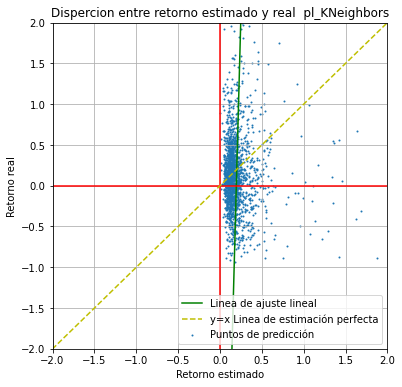

In [13]:
plt.figure(figsize=(6,6))
plotDensityContourPredVsReal('pl_KNeighbors', y_pred, y_test.to_numpy(),2)

In [14]:
observePredictionAbility(pl_KNeighbors)

Predicted Performance of Top 10 Return Portfolios: [155.12 153.44 147.83 164.73 158.15 154.08 164.29 166.78 158.14 175.06]
Actual Performance of Top 10 Return Portfolios: [ 10.22  20.75  54.44  26.44 162.33 412.22  79.37   9.49  26.42  11.92] 

Predicted Performance of Bottom 10 Return Portfolios: [2.47 2.95 3.13 0.67 2.79 1.71 2.67 3.14 2.57 2.5 ]
Actual Performance of Bottom 10 Return Portfolios: [ 4.909e+01  1.801e+01 -2.000e-02  1.523e+01 -1.298e+01  2.556e+01
  2.341e+01  9.850e+00  1.062e+01  8.130e+00]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 7.55
Mean Actual Std. Dev. of Top 10 Return Portfolios: 118.96
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 0.71
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 15.66
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 159.76
Mean Actual Performance of Top 10 Return Portfolios: 81.36
Mean Predicted Performance of Bottom 10 Return Portfolios: 2.46
Mean Actual Performance of B

### ARBOL DE DECISIÓN

In [72]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

pl_decTree = Pipeline([
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=42, max_depth=9))
])

pl_decTree.fit(X_train, y_train)
y_pred = pl_decTree.predict(X_test)
from sklearn.metrics import mean_squared_error
print('train mse: ', mean_squared_error(y_train, pl_decTree.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))
print('train rmse: ', mean_squared_error(y_train, pl_decTree.predict(X_train), squared = False))
print('test rmse: ', mean_squared_error(y_test, y_pred, squared = False))
print('Training set score:',  format(pl_decTree.score(X_train, y_train)))
print('Test set score:', format(pl_decTree.score(X_test, y_test)))

import pickle
pickle.dump(pl_decTree, open("pl_decTree.p", "wb" ))

train mse:  0.37567926625559145
test mse:  1.4059797969955596
train rmse:  0.6129268033424476
test rmse:  1.1857401895000268
Training set score: 0.7732482761118921
Test set score: -0.11819668813525608


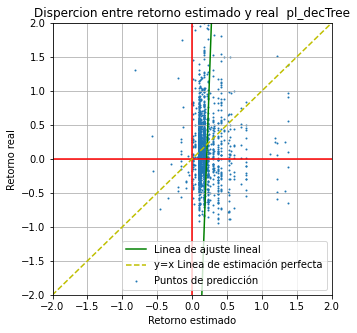

In [16]:
plt.figure(figsize=(5,5))
plotDensityContourPredVsReal('pl_decTree', y_pred, y_test.to_numpy(),2)

In [17]:
# See top 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_top10 = (y_predtest[0] > y_predtest.nlargest(10,0).tail(1)[0].values[0])
y_test_reindexed=y_test.reset_index(drop=True)

#print('Returns:',y_predtest[bl_top10][0].values)
print('Top 10 Predicted Returns:', round( np.mean(y_predtest[bl_top10][0])*100,2 ), '%','\n')
#print('Returns:', y_test_reindexed[bl_top10].values)
print('Actual Top 10 Returns:', round( np.mean(y_test_reindexed[bl_top10])*100,2 ), '%','\n')

# See bottom 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_bottom10 = (y_predtest[0] < y_predtest.nsmallest(10,0).tail(1)[0].values[0])

#print('Returns:',y_predtest[bl_bottom10][0].values)
print('Bottom 10 Predicted Returns:', round( np.mean(y_predtest[bl_bottom10][0])*100,2 ), '%','\n')
#print('Returns:',y_test_reindexed[bl_bottom10].values)
print('Actual Bottom 10 Returns:', round( np.mean(y_test_reindexed[bl_bottom10])*100,2 ), '%')

Top 10 Predicted Returns: 565.28 % 

Actual Top 10 Returns: 88.79 % 

Bottom 10 Predicted Returns: -47.74 % 

Actual Bottom 10 Returns: 41.66 %


In [18]:
observePredictionAbility(pl_decTree)

Predicted Performance of Top 10 Return Portfolios: [1883.65 1235.9   488.72  741.33  403.57  565.28  721.17  976.04  324.23
 2376.69]
Actual Performance of Top 10 Return Portfolios: [101.97  41.    90.26 107.75  29.47  88.79 137.76 -10.1   16.44 100.32] 

Predicted Performance of Bottom 10 Return Portfolios: [-42.99 -53.61 -53.29 -60.56 -58.89 -47.74 -51.91 -50.9  -39.62 -65.55]
Actual Performance of Bottom 10 Return Portfolios: [ 31.08  66.91  -5.48 -15.6  118.24  41.66 -10.54   5.88 -18.34 101.13]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 642.79
Mean Actual Std. Dev. of Top 10 Return Portfolios: 45.26
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 7.48
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 47.14
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 971.66
Mean Actual Performance of Top 10 Return Portfolios: 70.37
Mean Predicted Performance of Bottom 10 Return Portfolios: -52.51
Mean Actual Performance of Bottom 1

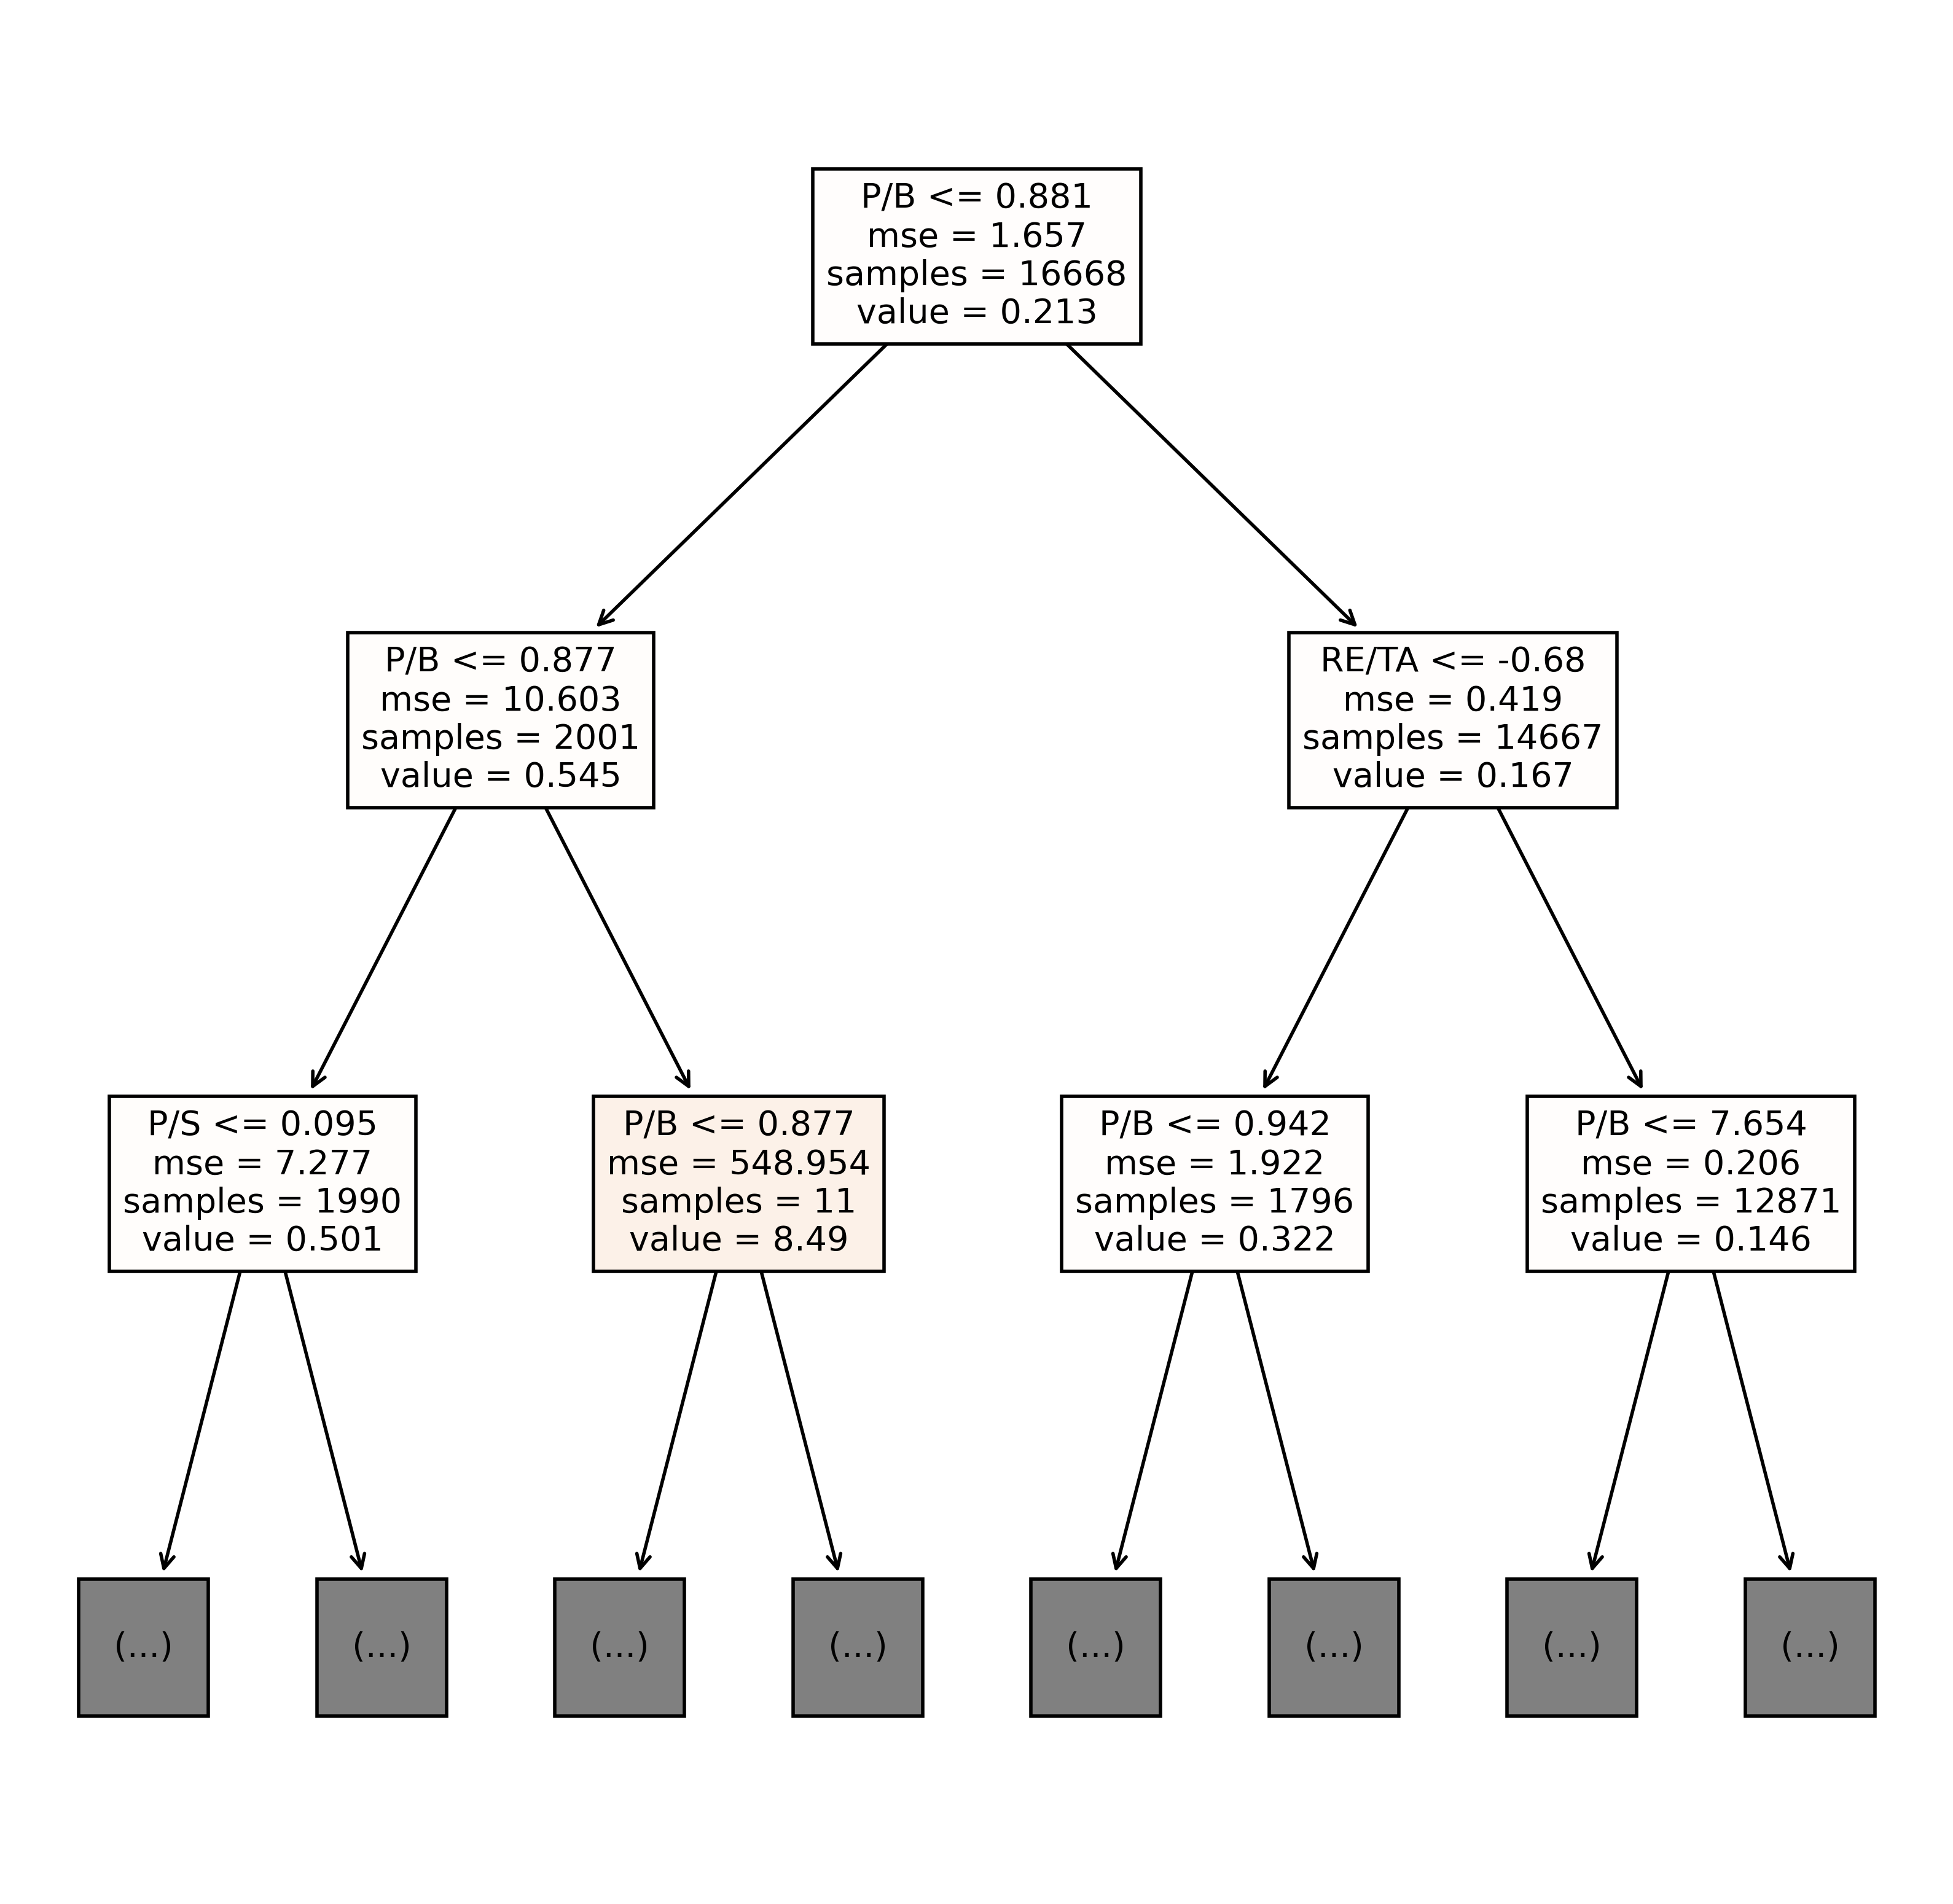

In [19]:
# See the decision tree
reg_decTree = DecisionTreeRegressor(random_state=42, max_depth=20)
reg_decTree.fit(X_train, y_train)
from sklearn import tree # Need this to see decision tree.
plt.figure(figsize=(10,10), dpi=400) # set figsize so we can see it
tree.plot_tree(reg_decTree, feature_names = x.keys(),  filled = True, max_depth=2, fontsize=10);

# BOSQUES ALEATORIO

In [73]:
from sklearn.ensemble import RandomForestRegressor

rfregressor = RandomForestRegressor(random_state=5, max_depth=10)

rfregressor.fit(X_train, y_train)
y_pred = rfregressor.predict(X_test)
print('train mse: ', mean_squared_error(y_train, rfregressor.predict(X_train)))
print('test mse: ', mean_squared_error(y_test, y_pred))
print('train rmse: ', mean_squared_error(y_train, rfregressor.predict(X_train), squared = False))
print('test rmse: ', mean_squared_error(y_test, y_pred, squared = False))
print('Training set score:',  format(rfregressor.score(X_train, y_train)))
print('Test set score:', format(rfregressor.score(X_test, y_test)))

import pickle
pickle.dump(rfregressor, open("pl_rfregressor.p", "wb" ))

C:\Users\Usuario\AppData\Local\Temp/ipykernel_16468/2145696113.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfregressor.fit(X_train, y_train)


train mse:  0.4960547629697645
test mse:  1.2804288499511431
train rmse:  0.7043115524892123
test rmse:  1.1315603607192783
Training set score: 0.7005922797725685
Test set score: -0.018344148662560622


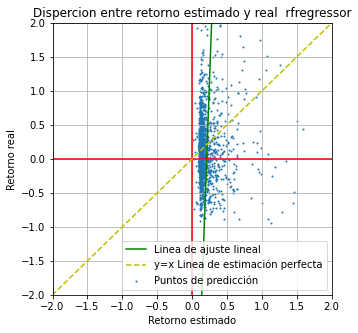

In [74]:
plt.figure(figsize=(5,5))
plotDensityContourPredVsReal('rfregressor', y_pred, y_test.to_numpy(),2)


In [22]:
# See top 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_top10 = (y_predtest[0] > y_predtest.nlargest(10,0).tail(1)[0].values[0])
y_test_reindexed=y_test.reset_index(drop=True)

#print('Returns:',y_predtest[bl_top10][0].values)
print('Top 10 Predicted Returns:', round( np.mean(y_predtest[bl_top10][0])*100,2 ), '%','\n')
#print('Returns:', y_test_reindexed[bl_top10].values)
print('Actual Top 10 Returns:', round( np.mean(y_test_reindexed[bl_top10])*100,2 ), '%','\n')

# See bottom 10 stocks and see how the values differ
y_predtest=pd.DataFrame(y_pred)
bl_bottom10 = (y_predtest[0] < y_predtest.nsmallest(10,0).tail(1)[0].values[0])

#print('Returns:',y_predtest[bl_bottom10][0].values)
print('Bottom 10 Predicted Returns:', round( np.mean(y_predtest[bl_bottom10][0])*100,2 ), '%','\n')
#print('Returns:',y_test_reindexed[bl_bottom10].values)
print('Actual Bottom 10 Returns:', round( np.mean(y_test_reindexed[bl_bottom10])*100,2 ), '%')

Top 10 Predicted Returns: 401.66 % 

Actual Top 10 Returns: 46.96 % 

Bottom 10 Predicted Returns: 3.61 % 

Actual Bottom 10 Returns: 30.04 %


In [23]:
observePredictionAbility(rfregressor)

Predicted Performance of Top 10 Return Portfolios: [ 764.71  696.17  379.66  364.66  525.47  401.66  318.97  522.62  265.04
 1054.87]
Actual Performance of Top 10 Return Portfolios: [ 49.14 159.35  52.22 121.38  76.73  46.96  33.63  31.5   -8.33  60.75] 

Predicted Performance of Bottom 10 Return Portfolios: [-1.93 -4.75 -0.32 -6.37 -7.27  3.61  1.94 -8.    2.23 -6.97]
Actual Performance of Bottom 10 Return Portfolios: [  0.63 -23.43  -6.82  56.46   3.76  30.04  14.5    8.44 -24.92  98.16]
--------------

Mean Predicted Std. Dev. of Top 10 Return Portfolios: 232.25
Mean Actual Std. Dev. of Top 10 Return Portfolios: 45.15
Mean Predicted Std. Dev. of Bottom 10 Return Portfolios: 4.2
Mean Actual Std. Dev. of Bottom 10 Return Portfolios: 35.75
--------------

Mean Predicted Performance of Top 10 Return Portfolios: 529.38
Mean Actual Performance of Top 10 Return Portfolios: 62.33
Mean Predicted Performance of Bottom 10 Return Portfolios: -2.78
Mean Actual Performance of Bottom 10 Return Por

In [24]:
# Can see the importance of each feature in random forest.
ks, scores=[],[]
for k, score in zip(x.keys(), rfregressor.feature_importances_):
    print(k, round(score,3))
    ks.append(k)
    scores.append(score)

P/B 0.137
P/S 0.248
RoE 0.078
Debt/Equity 0.03
Debt Ratio 0.052
RE/TA 0.287
EBIT/TA 0.168


Text(0.5, 1.0, 'Random Forest Feature Relative Importance')

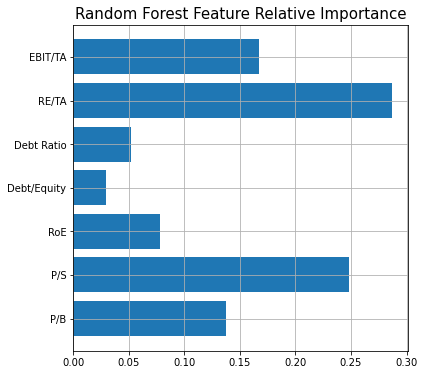

In [25]:
plt.figure(figsize=(6,6))
plt.barh(ks,scores)
plt.grid()
plt.title('Random Forest Feature Relative Importance',fontsize=15)

In [26]:
 x.mean()

P/B             4.066544
P/S            14.936453
RoE             0.025857
Debt/Equity     2.326597
Debt Ratio      2.706315
RE/TA          -0.329447
EBIT/TA         0.022236
dtype: float64

In [27]:
y.mean()

0.21359472483409114

In [28]:
# Put in a dataframe for prediction
avg_company = pd.DataFrame(x.mean().values.reshape(1,-1), columns=x.keys())

In [29]:
rfregressor.predict(avg_company)

array([0.44787203])

In [75]:
pl_linear.predict(avg_company)

array([0.05072323])

In [76]:
pl_KNeighbors.predict(avg_company)

array([0.0861888])

In [77]:
pl_decTree.predict(avg_company)

array([0.1700752])

# BACKTESTING 

# RLINEAL

In [10]:
# Code from Book: Build Your Own AI Investor
# Damon Lee 2020
# Check out the performance on www.valueinvestingai.com
# Code uses data from the (presumably) nice people at https://simfin.com/. 
# Feel free to fork this code for others to see what can be done with it.

import pandas as pd
import numpy as np
import math
import pickle # get the ML model from other notebook
from matplotlib import pyplot as plt # scatter plot
import matplotlib.lines as mlines # plot

In [11]:
# X AND Y (no splitting for train/test)
# Financial ratios 
x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios_Metodo_Envoltura.csv", index_col=0)
# annual stock performances
y=pd.read_csv("Annual_Stock_Price_Performance_Filtered.csv", index_col=0)
# convert to date
y["Date"], y["Date2"]=pd.to_datetime(y["Date"]), pd.to_datetime(y["Date2"])

# X AND Y (splitting for train/test)
X_train=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios_train_filtered.csv", index_col=0)
X_test=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios_test_filtered.csv", index_col=0)
y_train=pd.read_csv("Annual_Stock_Price_Performance_Percentage_train_filtered.csv", index_col=0)
y_test=pd.read_csv("Annual_Stock_Price_Performance_Percentage_test_filtered.csv", index_col=0)

y_=pd.DataFrame()
y_=y.loc[y_test.index.values, :]

# convert string to datetime
y_["Date"], y_["Date2"]=pd.to_datetime(y_["Date"]), pd.to_datetime(y_["Date2"])

In [12]:
# Daily stock price time series for ALL stocks. 5M rows. Some days missing.
def getYRawData():
    daily_stock_prices=pd.read_csv('C:/Users/Usuario/MachineLearning/Stock_Data/SimFin/us-shareprices-daily/us-shareprices-daily.csv',\
                                   delimiter=';')
    daily_stock_prices["Date"]=pd.to_datetime(daily_stock_prices["Date"])
    print('Reading historical time series stock data, matrix size is: ', daily_stock_prices.shape)
    return daily_stock_prices

In [13]:
def getYPerf(y_):
    y=pd.DataFrame()
    y["Ticker"] = y_["Ticker"]
    y["Perf"]=(y_["Open Price2"]-y_["Open Price"])/y_["Open Price"]
    y[y["Perf"].isnull()]=0
    return y

In [14]:
def getStockPriceBetweenDates(date1, date2, ticker, d, rows):
#     # Alternative way
#     rows = d[(d["Date"].between(pd.to_datetime(date1),\
#                                 pd.to_datetime(date2) )) \
#                                  & (d["Ticker"]==ticker)]
    rows = d.loc[(d["Date"].values>date1) &\
                 (d["Date"].values<date2) &\
                 (d["Ticker"]==ticker)]
    return rows

In [15]:
def getStockPriceData(ticker, y_, mask, daily_stock_prices, rows):
    date1 = y_[mask][y_[mask]["Ticker"] == ticker]["Date"].values[0]
    date2 = y_[mask][y_[mask]["Ticker"] == ticker]["Date2"].values[0]
    rows = getStockPriceBetweenDates(date1, date2,\
                                     ticker, daily_stock_prices, rows)
    return rows

In [16]:
def getDataForDateRange(date_Index_New, rows):
    WeeklyStockDataRows = pd.DataFrame()
    for I in date_Index_New:
        WeeklyStockDataRows = WeeklyStockDataRows.append(\
          rows.iloc[rows.index.get_loc(I, method="nearest")])
    return WeeklyStockDataRows

In [17]:
def getStockTimeSeries(dateTimeIndex, y_, tickers, mask, daily_stock_prices):
    stockRet = pd.DataFrame(index=dateTimeIndex)
    dTI_new = dateTimeIndex.strftime('%Y-%m-%d') # Change Date Format
    rows=pd.DataFrame()
    for tick in tickers:
        # Here "rows" is stock price time series data for individual stock
        rows = getStockPriceData(tick, y_, mask, daily_stock_prices, rows)
        rows.index = pd.DatetimeIndex(rows["Date"])
        WeeklyStockDataRows = getDataForDateRange(dTI_new, rows)
        # Here can use Open, Close, Adj. Close, etc. price
        stockRet[tick]=WeeklyStockDataRows["Close"].values
    return stockRet

In [18]:
def getPortfolioRelativeTimeSeries(stockRet):
    for key in stockRet.keys():
        stockRet[key]=stockRet[key]/stockRet[key][0]
    stockRet["Portfolio"] = stockRet.sum(axis=1)/(stockRet.keys().shape[0])
    return stockRet

In [19]:
### First tutorial function reader will write for backtest, will add altmanZ score filter later in chapter. ###

def getPortTimeSeriesForYear(date_starting, y_, x, daily_stock_prices, ml_model_pipeline):
    # get y dataframe as ticker and ticker performance only
    y = getYPerf(y_)
    # Get performance only for time frame we care about,
    # mask original data using the start date
    mask = y_["Date"].between(\
            pd.to_datetime(date_starting) - pd.Timedelta(days=60),\
            pd.to_datetime(date_starting) + pd.Timedelta(days=60) )
    # Get return prediction from model
    y_pred = ml_model_pipeline.predict(x[mask])
    # Make it a DataFrame to select the top picks
    y_pred = pd.DataFrame(y_pred)
    
    # Bool list of top stocks
    bl = (y_pred[0] > y_pred.nlargest(8,0).tail(1)[0].values[0]) 
    # DatetimeIndex
    dateTimeIndex = pd.date_range(\
                        start=date_starting, periods=52, freq='W')
    # 7 greatest performance stocks of y_pred 
    ticker_list = y[mask].reset_index(drop=True)[bl]["Ticker"].values
    
    # Issue with one of the tickers equaling 0, fix with lambda function
    #ticker_list = list(filter(lambda dateTimeIndex: dateTimeIndex != 0, ticker_list))

    # After we know our stock picks, we get the stock performance
    # Get DataFrame index of time stamp, series of stock prices, keys=tickers
    stockRet = getStockTimeSeries(dateTimeIndex, y_, ticker_list, mask, daily_stock_prices)
    # Get DataFrame of relative stock prices from 1st day(or close) and wnole portfolio
    stockRetRel = getPortfolioRelativeTimeSeries(stockRet)
    return [stockRetRel, stockRetRel["Portfolio"], ticker_list]

In [20]:
def getPortTimeSeries(y_, x, daily_stock_prices, ml_model_pipeline, verbose=True):
    dr=pd.date_range(start='2009-01-01', periods=11, freq='Y') # Date range
    port_perf_all_years = pd.DataFrame()
    ref=1 # relative performance reference.
    for curr_date in dr:
        [comp, this_year_perf, ticker_list] = \
        getPortTimeSeriesForYear(curr_date, y_, x,\
                                 daily_stock_prices, ml_model_pipeline)
        if verbose:
            print("Backtest performance for year starting ",\
                  curr_date, " is:",\
                  round((this_year_perf.iloc[-1]-1)*100,2), "%")
            print("With stocks:", ticker_list)
            for tick in ticker_list:
                print(tick, "Performance was:",\
                      round((comp[tick].iloc[-1]-1)*100,2), "%" )
            print("---------------------------------------------")
        
        this_year_perf = this_year_perf * ref
        port_perf_all_years = pd.concat([port_perf_all_years,\
                                         this_year_perf])
        ref = this_year_perf.iloc[-1]
    port_perf_all_years.columns = ["Indexed Performance"]
    return port_perf_all_years

In [21]:
daily_stock_prices=getYRawData()

Reading historical time series stock data, matrix size is:  (8125701, 11)


In [51]:
#pl_linear.p, pl_ElasticNet.p, pl_KNeighbors.p, pl_rfregressor.p, pl_decTree.p, pl_svm.p
regressor_pipeline = pickle.load(open("pl_linear.p", "rb" ))
#regressor_pipeline = pickle.load(open("rfregressor.p", "rb" ))
test = getPortTimeSeries(y_, X_test, daily_stock_prices, regressor_pipeline, verbose=True)
print('Performance is: ', 100 * (test["Indexed Performance"][-1]-1), '%')

Backtest performance for year starting  2009-12-31 00:00:00  is: 72.55 %
With stocks: ['BDC' 'TEL' 'IPG' 'HRC' 'LSI_old' 'ALV' 'FTK']
BDC Performance was: 72.46 %
TEL Performance was: 23.77 %
IPG Performance was: 29.42 %
HRC Performance was: 62.79 %
LSI_old Performance was: 15.11 %
ALV Performance was: 77.22 %
FTK Performance was: 227.07 %
---------------------------------------------
Backtest performance for year starting  2010-12-31 00:00:00  is: -2.93 %
With stocks: ['WNC' 'ADXS' 'PTE' 'TST' 'LYV' 'NCMI' 'HZO']
WNC Performance was: -23.22 %
ADXS Performance was: 21.43 %
PTE Performance was: 112.1 %
TST Performance was: -44.7 %
LYV Performance was: -19.16 %
NCMI Performance was: -33.3 %
HZO Performance was: -33.69 %
---------------------------------------------
Backtest performance for year starting  2011-12-31 00:00:00  is: -1.52 %
With stocks: ['MTOR' 'SOFO' 'STRR' 'AAL' 'HSKA' 'CBB' 'AMRS']
MTOR Performance was: -30.66 %
SOFO Performance was: 0.54 %
STRR Performance was: -3.94 %
A

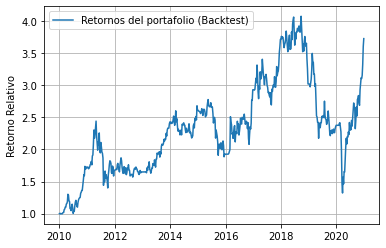

In [52]:
plt.plot(test)
plt.grid()
plt.legend(['Retornos del portafolio (Backtest)'])
plt.ylabel('Retorno Relativo');

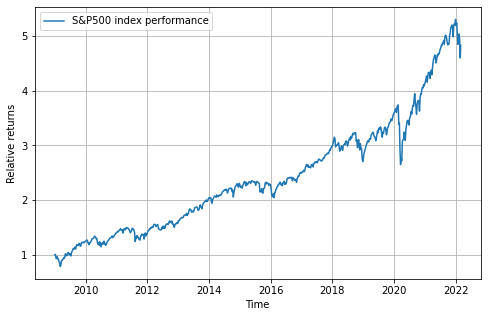

In [53]:
# GSPC.csv taken directly from Yahoo.com is the S&P500.
spy=pd.read_csv("GSPC.csv", index_col='Date', parse_dates=True)
spy['Relative'] = spy["Open"]/spy["Open"][0]

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))
plt.plot(spy['Relative'])
plt.grid()
plt.xlabel('Time')
plt.ylabel('Relative returns')
plt.legend(['S&P500 index performance', 'Linear Regressor Stock Picker'])

In [54]:
start_date = "2010-01-03"
end_date = "2020-12-27"

after_start_date = spy.index >= start_date
before_end_date = spy.index <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = spy.loc[between_two_dates]

In [55]:
filtered_dates.drop(['Relative'], axis=1)

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-01-07,53,1136.270020,1149.739990,1131.319946,1145.680054,1145.680054,22802570000
2010-01-14,54,1145.680054,1150.449951,1129.250000,1138.040039,1138.040039,18209320000
2010-01-21,55,1138.680054,1141.579956,1083.109985,1097.500000,1097.500000,27615360000
2010-01-28,56,1096.930054,1104.729980,1071.589966,1097.280029,1097.280029,23977850000
2010-02-04,57,1097.250000,1097.250000,1044.500000,1068.130005,1068.130005,25754120000
...,...,...,...,...,...,...,...
2020-11-26,621,3638.550049,3678.449951,3594.389893,3669.010010,3669.010010,19503130000
2020-12-03,622,3668.280029,3712.389893,3657.169922,3672.820068,3672.820068,24726300000
2020-12-10,623,3659.129883,3711.270020,3633.399902,3701.169922,3701.169922,21997540000


In [56]:
filtered_dates['Relative'] = filtered_dates["Open"]/filtered_dates["Open"][0]

C:\Users\Usuario\AppData\Local\Temp/ipykernel_16468/1391807714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dates['Relative'] = filtered_dates["Open"]/filtered_dates["Open"][0]


In [57]:
filtered_dates

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Relative
Date,,,,,,,,
2010-01-07,53,1136.270020,1149.739990,1131.319946,1145.680054,1145.680054,22802570000,1.000000
2010-01-14,54,1145.680054,1150.449951,1129.250000,1138.040039,1138.040039,18209320000,1.008282
2010-01-21,55,1138.680054,1141.579956,1083.109985,1097.500000,1097.500000,27615360000,1.002121
2010-01-28,56,1096.930054,1104.729980,1071.589966,1097.280029,1097.280029,23977850000,0.965378
2010-02-04,57,1097.250000,1097.250000,1044.500000,1068.130005,1068.130005,25754120000,0.965660
...,...,...,...,...,...,...,...,...
2020-11-26,621,3638.550049,3678.449951,3594.389893,3669.010010,3669.010010,19503130000,3.202188
2020-12-03,622,3668.280029,3712.389893,3657.169922,3672.820068,3672.820068,24726300000,3.228352
2020-12-10,623,3659.129883,3711.270020,3633.399902,3701.169922,3701.169922,21997540000,3.220300


In [58]:
modelo = "RLineal"

Volatilidad Modelo:  0.7474654384838735
Volatilidad S&P 500:  0.3131362579812779
Retorno modelo:   272.9975045812081 %
Retorno S&P 500:   225.10142518765042 %


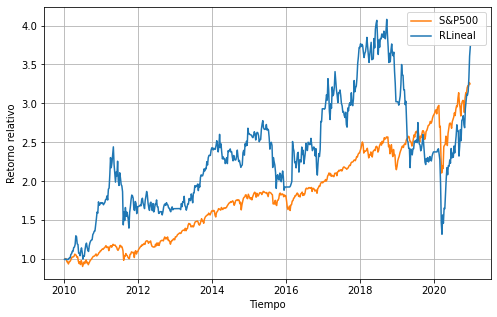

In [59]:
plt.figure(figsize=(8,5))
plt.plot(filtered_dates['Relative'], color='C1')
plt.plot(test["Indexed Performance"], color='C0')
plt.legend(['S&P500 ', modelo])
plt.xlabel('Tiempo')
plt.ylabel('Retorno relativo')
plt.grid()
print('Volatilidad Modelo: ', test['Indexed Performance'].diff().std()*np.sqrt(52))
print('Volatilidad S&P 500: ', filtered_dates['Relative'].diff().std()*np.sqrt(52))
print('Retorno modelo:  ', 100 * (test["Indexed Performance"][-1]-1), '%')
print('Retorno S&P 500:  ', 100 * (filtered_dates["Relative"][-1]-1), '%')

In [60]:
#pl_linear.p, pl_ElasticNet.p, pl_KNeighbors.p, pl_rfregressor.p, pl_decTree.p, pl_svm.p
regressor_pipeline = pickle.load(open("pl_KNeighbors.p", "rb" ))
#regressor_pipeline = pickle.load(open("rfregressor.p", "rb" ))
test = getPortTimeSeries(y_, X_test, daily_stock_prices, regressor_pipeline, verbose=True)
print('Performance is: ', 100 * (test["Indexed Performance"][-1]-1), '%')

Backtest performance for year starting  2009-12-31 00:00:00  is: 69.25 %
With stocks: ['SLGN' 'ILMN' 'CNP' 'LSI_old' 'SWKS' 'ADI' 'FTK']
SLGN Performance was: 34.39 %
ILMN Performance was: 68.33 %
CNP Performance was: 16.91 %
LSI_old Performance was: 15.11 %
SWKS Performance was: 110.16 %
ADI Performance was: 12.76 %
FTK Performance was: 227.07 %
---------------------------------------------
Backtest performance for year starting  2010-12-31 00:00:00  is: 8.18 %
With stocks: ['WNC' 'SNEX' 'ADXS' 'CVS' 'LYV' 'RGR' 'XCO']
WNC Performance was: -23.22 %
SNEX Performance was: 2.84 %
ADXS Performance was: 21.43 %
CVS Performance was: 25.41 %
LYV Performance was: -19.16 %
RGR Performance was: 102.0 %
XCO Performance was: -52.06 %
---------------------------------------------
Backtest performance for year starting  2011-12-31 00:00:00  is: -11.2 %
With stocks: ['MTOR' 'AAL' 'TPX' 'KATE' 'CCXI' 'AMRS' 'DIT']
MTOR Performance was: -30.66 %
AAL Performance was: 46.48 %
TPX Performance was: -54.56

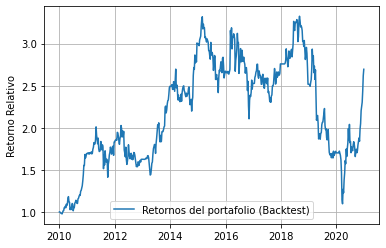

In [61]:
plt.plot(test)
plt.grid()
plt.legend(['Retornos del portafolio (Backtest)'])
plt.ylabel('Retorno Relativo');

In [62]:
modelo = "KNN"

Volatilidad Modelo:  0.6426957788199732
Volatilidad S&P 500:  0.3131362579812779
Retorno modelo:   169.5357236433042 %
Retorno S&P 500:   225.10142518765042 %


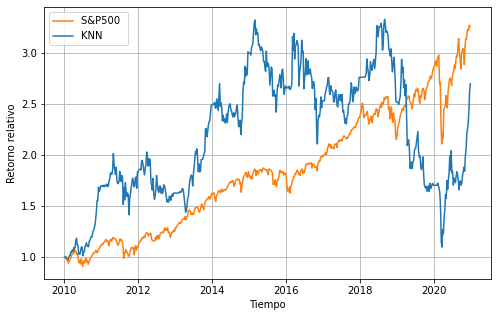

In [63]:
plt.figure(figsize=(8,5))
plt.plot(filtered_dates['Relative'], color='C1')
plt.plot(test["Indexed Performance"], color='C0')
plt.legend(['S&P500 ', modelo])
plt.xlabel('Tiempo')
plt.ylabel('Retorno relativo')
plt.grid()
print('Volatilidad Modelo: ', test['Indexed Performance'].diff().std()*np.sqrt(52))
print('Volatilidad S&P 500: ', filtered_dates['Relative'].diff().std()*np.sqrt(52))
print('Retorno modelo:  ', 100 * (test["Indexed Performance"][-1]-1), '%')
print('Retorno S&P 500:  ', 100 * (filtered_dates["Relative"][-1]-1), '%')

In [64]:
#pl_linear.p, pl_ElasticNet.p, pl_KNeighbors.p, pl_rfregressor.p, pl_decTree.p, pl_svm.p
regressor_pipeline = pickle.load(open("pl_decTree.p", "rb" ))
#regressor_pipeline = pickle.load(open("rfregressor.p", "rb" ))
test = getPortTimeSeries(y_, X_test, daily_stock_prices, regressor_pipeline, verbose=True)
print('Performance is: ', 100 * (test["Indexed Performance"][-1]-1), '%')

Backtest performance for year starting  2009-12-31 00:00:00  is: 70.62 %
With stocks: ['ILMN' 'MGLN' 'LSI_old' 'FTK' 'TXN']
ILMN Performance was: 68.33 %
MGLN Performance was: 11.74 %
LSI_old Performance was: 15.11 %
FTK Performance was: 227.07 %
TXN Performance was: 30.83 %
---------------------------------------------
Backtest performance for year starting  2010-12-31 00:00:00  is: -31.13 %
With stocks: ['WNC' 'ADXS' 'NFLX' 'HZO' 'XCO']
WNC Performance was: -23.22 %
ADXS Performance was: 21.43 %
NFLX Performance was: -68.13 %
HZO Performance was: -33.69 %
XCO Performance was: -52.06 %
---------------------------------------------
Backtest performance for year starting  2011-12-31 00:00:00  is: -0.28 %
With stocks: ['MTOR' 'AAL' 'LSTR' 'CCXI' 'AMRS' 'TRIP']
MTOR Performance was: -30.66 %
AAL Performance was: 46.48 %
LSTR Performance was: -3.44 %
CCXI Performance was: -1.18 %
AMRS Performance was: -48.14 %
TRIP Performance was: 35.24 %
---------------------------------------------
Back

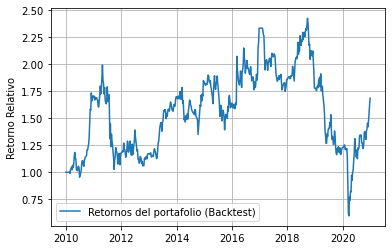

In [65]:
plt.plot(test)
plt.grid()
plt.legend(['Retornos del portafolio (Backtest)'])
plt.ylabel('Retorno Relativo');

In [66]:
modelo = "Adecisión"

Volatilidad Modelo:  0.46537411186960326
Volatilidad S&P 500:  0.3131362579812779
Retorno modelo:   68.60212266032835 %
Retorno S&P 500:   225.10142518765042 %


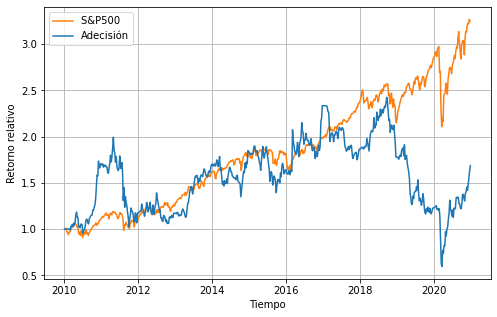

In [67]:
plt.figure(figsize=(8,5))
plt.plot(filtered_dates['Relative'], color='C1')
plt.plot(test["Indexed Performance"], color='C0')
plt.legend(['S&P500 ', modelo])
plt.xlabel('Tiempo')
plt.ylabel('Retorno relativo')
plt.grid()
print('Volatilidad Modelo: ', test['Indexed Performance'].diff().std()*np.sqrt(52))
print('Volatilidad S&P 500: ', filtered_dates['Relative'].diff().std()*np.sqrt(52))
print('Retorno modelo:  ', 100 * (test["Indexed Performance"][-1]-1), '%')
print('Retorno S&P 500:  ', 100 * (filtered_dates["Relative"][-1]-1), '%')

In [68]:
#pl_linear.p, pl_ElasticNet.p, pl_KNeighbors.p, pl_rfregressor.p, pl_decTree.p, pl_svm.p
regressor_pipeline = pickle.load(open("pl_rfregressor.p", "rb" ))
#regressor_pipeline = pickle.load(open("rfregressor.p", "rb" ))
test = getPortTimeSeries(y_, X_test, daily_stock_prices, regressor_pipeline, verbose=True)
print('Performance is: ', 100 * (test["Indexed Performance"][-1]-1), '%')

Backtest performance for year starting  2009-12-31 00:00:00  is: 84.13 %
With stocks: ['ILMN' 'FFIV' 'LSI_old' 'SWKS' 'LMT' 'FTK' 'CTSH']
ILMN Performance was: 68.33 %
FFIV Performance was: 127.29 %
LSI_old Performance was: 15.11 %
SWKS Performance was: 110.16 %
LMT Performance was: -10.87 %
FTK Performance was: 227.07 %
CTSH Performance was: 51.85 %
---------------------------------------------
Backtest performance for year starting  2010-12-31 00:00:00  is: -12.61 %
With stocks: ['WNC' 'ADXS' 'PTE' 'TST' 'NFLX' 'HZO' 'XCO']
WNC Performance was: -23.22 %
ADXS Performance was: 21.43 %
PTE Performance was: 112.1 %
TST Performance was: -44.7 %
NFLX Performance was: -68.13 %
HZO Performance was: -33.69 %
XCO Performance was: -52.06 %
---------------------------------------------
Backtest performance for year starting  2011-12-31 00:00:00  is: -3.97 %
With stocks: ['MTOR' 'STRR' 'AAL' 'KATE' 'CCXI' 'AMRS' 'DIT']
MTOR Performance was: -30.66 %
STRR Performance was: -3.94 %
AAL Performance w

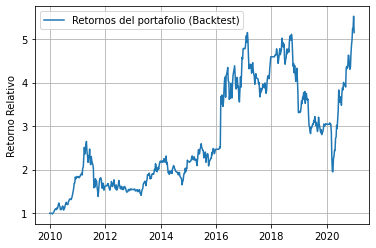

In [69]:
plt.plot(test)
plt.grid()
plt.legend(['Retornos del portafolio (Backtest)'])
plt.ylabel('Retorno Relativo');

In [70]:
modelo = "BAleatorio"

Volatilidad Modelo:  0.9850311475706421
Volatilidad S&P 500:  0.3131362579812779
Retorno modelo:   414.834361721138 %
Retorno S&P 500:   225.10142518765042 %


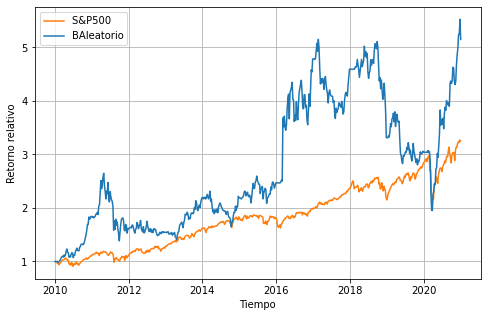

In [71]:
plt.figure(figsize=(8,5))
plt.plot(filtered_dates['Relative'], color='C1')
plt.plot(test["Indexed Performance"], color='C0')
plt.legend(['S&P500 ', modelo])
plt.xlabel('Tiempo')
plt.ylabel('Retorno relativo')
plt.grid()
print('Volatilidad Modelo: ', test['Indexed Performance'].diff().std()*np.sqrt(52))
print('Volatilidad S&P 500: ', filtered_dates['Relative'].diff().std()*np.sqrt(52))
print('Retorno modelo:  ', 100 * (test["Indexed Performance"][-1]-1), '%')
print('Retorno S&P 500:  ', 100 * (filtered_dates["Relative"][-1]-1), '%')

# BACKTEST ESTADISTICO

# LOOP

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import pickle

In [3]:
# Linear model pipeline
def trainLinearModel(X_train, y_train):
    pl_linear = Pipeline([('Power Transformer', PowerTransformer()),
        ('linear', LinearRegression())])
    pl_linear.fit(X_train, y_train)
    return pl_linear

# KNeighbors regressor
def trainKNeighborsModel(X_train, y_train):
    pl_KNeighbors = Pipeline([('Power Transformer', PowerTransformer()),
        ('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=40))])
    pl_KNeighbors.fit(X_train, y_train)
    return pl_KNeighbors

# DecisionTreeRegressor
def traindecTreeModel(X_train, y_train):
    pl_decTree = Pipeline([
        ('DecisionTreeRegressor',\
         DecisionTreeRegressor(max_depth=20, random_state=42))
    ])
    pl_decTree.fit(X_train, y_train)
    return pl_decTree

# RandomForestRegressor
def trainrfregressorModel(X_train, y_train):
    pl_rfregressor = Pipeline([
        ('RandomForestRegressor',\
         RandomForestRegressor(max_depth=10, random_state=42))
    ])
    pl_rfregressor.fit(X_train, y_train)
    
    return pl_rfregressor

In [22]:
# Y percentage perf
y_pec=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)["Perf"]

In [23]:
y_=y.loc[y_test.index.values, :]

In [24]:
y

,Ticker,Open Price,Date,Volume,Ticker2,Open Price2,Date2,Volume2
0,A,16.78,2008-12-19,2.483239e+08,A,29.60,2009-12-21,9.319856e+07
1,A,29.60,2009-12-21,9.319856e+07,A,40.65,2010-12-21,1.469619e+08
2,A,40.10,2010-12-20,1.613504e+08,A,33.99,2011-12-20,1.247977e+08
3,A,33.73,2011-12-16,1.053320e+08,A,39.98,2012-12-17,1.381149e+08
4,A,40.58,2012-12-20,1.545570e+08,A,57.47,2013-12-20,1.697664e+08
...,...,...,...,...,...,...,...,...
18515,ZYNE,4.80,2019-03-11,2.979552e+06,ZYNE,3.61,2020-03-10,2.898415e+06
18516,ZYNE,3.61,2020-03-10,2.898415e+06,ZYNE,4.58,2021-03-10,7.940090e+06
18517,ZYXI,4.55,2018-02-28,5.852392e+05,ZYXI,4.51,2019-02-28,2.961627e+05
18518,ZYXI,5.09,2019-02-26,2.683601e+05,ZYXI,11.90,2020-02-26,3.442361e+06


In [28]:
# Choose the model pipelines to run loop for
#model_pipeline_list = ['pl_rfregressor', 'pl_decTree', 'pl_svm', 'pl_linear', 'pl_GradBregressor', 'pl_KNeighbors', 'pl_ElasticNet']
model_pipeline_list = ['pl_rfregressor']

i, results = 0, []
for model in model_pipeline_list:
    tests_per_model=1200
    for test_num in range(0, tests_per_model):
        X_train, X_test, y_train, y_test = train_test_split(x, y_pec,\
                                                            test_size=0.5)
        #Train different models
        if (model =='pl_linear'):
            model_pl = trainLinearModel(X_train, y_train)
        if (model =='pl_KNeighbors'):
            model_pl = trainKNeighborsModel(X_train, y_train)
        if (model =='pl_rfregressor'):
            model_pl = trainrfregressorModel(X_train, y_train)
        if (model =='pl_decTree'):
            model_pl = traindecTreeModel(X_train, y_train)

        y_=y.loc[y_test.index.values, :]
        
        # Here is our backtesting code
        test = getPortTimeSeries(y_, X_test,\
                             daily_stock_prices, model_pl, verbose=False) 
        perf = test['Indexed Performance'][-1]
        vol = test['Indexed Performance'].diff().std()*np.sqrt(52)
        print('Performed test ',i , [i, model, perf, vol])
        results.append([i, model, perf, vol])
        i=i+1

# Save our results for plotting
results_df = pd.DataFrame(results, columns=["Test Number",\
                                            "Model Used",\
                                            "Indexed Return",\
                                            "Annual Volatility"])


results_df.to_csv("Backtest_statistics_Big_filtrado_rfregressor.csv")

Performed test  0 [0, 'pl_rfregressor', 2.4748965862869, 0.45814333220908093]
Performed test  1 [1, 'pl_rfregressor', 14.274556554298472, 2.1277582603528207]
Performed test  2 [2, 'pl_rfregressor', 10.235777139997845, 4.333934259054876]
Performed test  3 [3, 'pl_rfregressor', 3.1087122914419307, 0.4650373666410139]
Performed test  4 [4, 'pl_rfregressor', 3.0591340926475774, 0.5827381456465313]
Performed test  5 [5, 'pl_rfregressor', 1.774459740747026, 0.5192073886983045]
Performed test  6 [6, 'pl_rfregressor', 11.395419858757919, 1.8442799972652275]
Performed test  7 [7, 'pl_rfregressor', 8.399864770032183, 1.4879886147645625]
Performed test  8 [8, 'pl_rfregressor', 16.017330060163392, 2.171507811894923]
Performed test  9 [9, 'pl_rfregressor', 5.700883618969472, 0.809015993342987]
Performed test  10 [10, 'pl_rfregressor', 10.415562037433778, 1.8094676882362621]
Performed test  11 [11, 'pl_rfregressor', 10.29179858919426, 1.5101202547308659]
Performed test  12 [12, 'pl_rfregressor', 2.1

Performed test  101 [101, 'pl_rfregressor', 1.6067471728200542, 0.5777041372876625]
Performed test  102 [102, 'pl_rfregressor', 5.252659425126725, 0.8048441181678352]
Performed test  103 [103, 'pl_rfregressor', 3.438984888806106, 1.211964711866605]
Performed test  104 [104, 'pl_rfregressor', 4.058523911952859, 0.7189152511921125]
Performed test  105 [105, 'pl_rfregressor', 1.3809998778035453, 0.3965460432032539]
Performed test  106 [106, 'pl_rfregressor', 9.008596768189166, 1.3805612517936168]
Performed test  107 [107, 'pl_rfregressor', 3.055306476630629, 1.0617632184098795]
Performed test  108 [108, 'pl_rfregressor', 1.84435948794965, 0.4733649727328292]
Performed test  109 [109, 'pl_rfregressor', 1.6281986867800888, 0.45819480223585834]
Performed test  110 [110, 'pl_rfregressor', 5.876098676957046, 1.2149378538200328]
Performed test  111 [111, 'pl_rfregressor', 18.813213600659125, 2.61365889563662]
Performed test  112 [112, 'pl_rfregressor', 5.505198164782785, 1.2734437825471343]
Per

Performed test  200 [200, 'pl_rfregressor', 5.326688197184292, 0.8311194367144412]
Performed test  201 [201, 'pl_rfregressor', 4.730771792831124, 0.8683803511145113]
Performed test  202 [202, 'pl_rfregressor', 4.2415278412871205, 0.8960988335214517]
Performed test  203 [203, 'pl_rfregressor', 0.5850825141154657, 0.4782126583617062]
Performed test  204 [204, 'pl_rfregressor', 12.383803081938767, 1.8457960320849818]
Performed test  205 [205, 'pl_rfregressor', 4.021176707200517, 0.877240448774646]
Performed test  206 [206, 'pl_rfregressor', 14.52020814494963, 2.311002115314416]
Performed test  207 [207, 'pl_rfregressor', 10.172445182777217, 1.8007079466566351]
Performed test  208 [208, 'pl_rfregressor', 3.9382806305531397, 0.5322900423088086]
Performed test  209 [209, 'pl_rfregressor', 1.0368595177696824, 0.3381184091691524]
Performed test  210 [210, 'pl_rfregressor', 9.458272309581766, 1.6039515715046395]
Performed test  211 [211, 'pl_rfregressor', 4.968791664617489, 1.0255366310057783]


Performed test  299 [299, 'pl_rfregressor', 18.400587046954314, 2.674944320167333]
Performed test  300 [300, 'pl_rfregressor', 1.1732342579499104, 0.468927638996942]
Performed test  301 [301, 'pl_rfregressor', 3.083599208640778, 0.6961974926935044]
Performed test  302 [302, 'pl_rfregressor', 3.986667325196482, 0.7477996769672868]
Performed test  303 [303, 'pl_rfregressor', 11.253283299059607, 1.9659740617445147]
Performed test  304 [304, 'pl_rfregressor', 1.8746522860045627, 0.46174622328250503]
Performed test  305 [305, 'pl_rfregressor', 4.866377926701015, 2.6442238924280304]
Performed test  306 [306, 'pl_rfregressor', 3.2704342485663442, 0.5873407307467511]
Performed test  307 [307, 'pl_rfregressor', 19.594742069107923, 2.054872246078558]
Performed test  308 [308, 'pl_rfregressor', 4.380349990878657, 0.6263651666601893]
Performed test  309 [309, 'pl_rfregressor', 5.582817970165307, 0.8746009639628091]
Performed test  310 [310, 'pl_rfregressor', 4.8710832553152335, 0.7191884706025069]

Performed test  398 [398, 'pl_rfregressor', 1.5064433592538045, 0.3064629438825621]
Performed test  399 [399, 'pl_rfregressor', 13.212855640603916, 1.5582447856819956]
Performed test  400 [400, 'pl_rfregressor', 1.0711557963575753, 0.34464948599569134]
Performed test  401 [401, 'pl_rfregressor', 20.50390896885835, 2.864945922729691]
Performed test  402 [402, 'pl_rfregressor', 4.2876764437435035, 0.5920927989123302]
Performed test  403 [403, 'pl_rfregressor', 9.541021309430086, 1.1024958747101115]
Performed test  404 [404, 'pl_rfregressor', 1.8503937075094865, 0.5727716548696256]
Performed test  405 [405, 'pl_rfregressor', 2.097561488781022, 0.6617609406071236]
Performed test  406 [406, 'pl_rfregressor', 2.301873013370673, 0.7424009999770745]
Performed test  407 [407, 'pl_rfregressor', 8.580170775545467, 1.2073205474303936]
Performed test  408 [408, 'pl_rfregressor', 6.709446084215152, 1.638517797672886]
Performed test  409 [409, 'pl_rfregressor', 3.376703704324949, 0.926653314901395]
P

Performed test  497 [497, 'pl_rfregressor', 16.092873640724406, 2.5606253235406675]
Performed test  498 [498, 'pl_rfregressor', 2.792160893057953, 1.4170052590080977]
Performed test  499 [499, 'pl_rfregressor', 56.6824873714289, 7.843061016209314]
Performed test  500 [500, 'pl_rfregressor', 1.619331500627109, 0.6652489408943203]
Performed test  501 [501, 'pl_rfregressor', 6.560398852604123, 0.7751346638085737]
Performed test  502 [502, 'pl_rfregressor', 1.5836121423668421, 0.2871780304204952]
Performed test  503 [503, 'pl_rfregressor', 1.2028895307664424, 0.37591144262882464]
Performed test  504 [504, 'pl_rfregressor', 22.698815749981428, 2.5607511973118364]
Performed test  505 [505, 'pl_rfregressor', 1.6965765523977785, 0.607121922028378]
Performed test  506 [506, 'pl_rfregressor', 1.2505187566751517, 0.5484059281078104]
Performed test  507 [507, 'pl_rfregressor', 2.2502466958370224, 1.0100251852468318]
Performed test  508 [508, 'pl_rfregressor', 2.7372837799236933, 0.7732103379208874

Performed test  596 [596, 'pl_rfregressor', 1.1921914660456603, 0.5495563600200541]
Performed test  597 [597, 'pl_rfregressor', 2.6781281702774478, 1.1804246158787086]
Performed test  598 [598, 'pl_rfregressor', 8.5470374794296, 1.2166776268228372]
Performed test  599 [599, 'pl_rfregressor', 5.822982276246094, 0.9029064489806167]
Performed test  600 [600, 'pl_rfregressor', 8.077611868513056, 1.5847201588875452]
Performed test  601 [601, 'pl_rfregressor', 0.5820891118037503, 0.39655141447881526]
Performed test  602 [602, 'pl_rfregressor', 3.2189985882066314, 0.5005858860516296]
Performed test  603 [603, 'pl_rfregressor', 4.817262085777292, 1.6714771218345648]
Performed test  604 [604, 'pl_rfregressor', 18.709698956657274, 3.1352411862543246]
Performed test  605 [605, 'pl_rfregressor', 0.9013906634880103, 0.4344229562848752]
Performed test  606 [606, 'pl_rfregressor', 2.7772262909938856, 0.7597132815317779]
Performed test  607 [607, 'pl_rfregressor', 4.396781300923009, 1.0839253219178486

Performed test  695 [695, 'pl_rfregressor', 1.220625754803815, 0.4171952861292593]
Performed test  696 [696, 'pl_rfregressor', 1.02648066663212, 0.6029153827382895]
Performed test  697 [697, 'pl_rfregressor', 1.6035657030654533, 0.5063722301703405]
Performed test  698 [698, 'pl_rfregressor', 1.578542082102253, 0.6680221418214771]
Performed test  699 [699, 'pl_rfregressor', 3.8626307364110755, 1.742505080531125]
Performed test  700 [700, 'pl_rfregressor', 1.7717220993951914, 0.5380881411360885]
Performed test  701 [701, 'pl_rfregressor', 29.772718983050712, 4.217317256310098]
Performed test  702 [702, 'pl_rfregressor', 9.625596591454581, 1.5427852163346134]
Performed test  703 [703, 'pl_rfregressor', 5.0279388317078855, 0.8718927757568545]
Performed test  704 [704, 'pl_rfregressor', 2.325855162631899, 0.6570524209310772]
Performed test  705 [705, 'pl_rfregressor', 1.808205833032284, 0.47343898152657743]
Performed test  706 [706, 'pl_rfregressor', 64.22531936380962, 8.72544890020519]
Per

Performed test  794 [794, 'pl_rfregressor', 2.0069287011638512, 0.6055017815073277]
Performed test  795 [795, 'pl_rfregressor', 3.1008870357029967, 0.7133788382443766]
Performed test  796 [796, 'pl_rfregressor', 2.2991746266218693, 0.47761688145228515]
Performed test  797 [797, 'pl_rfregressor', 5.273286501188776, 1.1510087951500123]
Performed test  798 [798, 'pl_rfregressor', 2.7606833552045327, 0.9385170068279455]
Performed test  799 [799, 'pl_rfregressor', 2.226938781083291, 0.6373376664746468]
Performed test  800 [800, 'pl_rfregressor', 13.66299654908068, 1.6748052269744518]
Performed test  801 [801, 'pl_rfregressor', 1.8831181400989374, 0.4045168066301166]
Performed test  802 [802, 'pl_rfregressor', 15.112863921509748, 2.908128660888558]
Performed test  803 [803, 'pl_rfregressor', 5.568404114164612, 0.8400946017417618]
Performed test  804 [804, 'pl_rfregressor', 0.9180667000112941, 0.4170386640590588]
Performed test  805 [805, 'pl_rfregressor', 1.8272437468037435, 0.75656161389384

Performed test  893 [893, 'pl_rfregressor', 4.161403852403067, 1.0602175371970506]
Performed test  894 [894, 'pl_rfregressor', 22.476041500702216, 3.607270536586785]
Performed test  895 [895, 'pl_rfregressor', 4.774347062216344, 0.996837199291137]
Performed test  896 [896, 'pl_rfregressor', 1.3169246626089788, 0.5567344481421062]
Performed test  897 [897, 'pl_rfregressor', 8.29015445925337, 1.184431736684766]
Performed test  898 [898, 'pl_rfregressor', 0.8632909954675813, 0.5006302732032575]
Performed test  899 [899, 'pl_rfregressor', 18.14397148501407, 2.71020600045789]
Performed test  900 [900, 'pl_rfregressor', 2.707204034193929, 0.6309535547963938]
Performed test  901 [901, 'pl_rfregressor', 43.28875495654241, 6.004612412446011]
Performed test  902 [902, 'pl_rfregressor', 21.560456260310225, 2.900180835305894]
Performed test  903 [903, 'pl_rfregressor', 7.768019079131931, 1.428486622266782]
Performed test  904 [904, 'pl_rfregressor', 2.313769869053797, 0.5713979029129895]
Performed

Performed test  992 [992, 'pl_rfregressor', 3.4731759362678454, 1.3622077099134757]
Performed test  993 [993, 'pl_rfregressor', 1.4352639518316865, 0.4288578656353539]
Performed test  994 [994, 'pl_rfregressor', 10.397726448173724, 2.386303705734632]
Performed test  995 [995, 'pl_rfregressor', 5.046028535807358, 0.876577974740502]
Performed test  996 [996, 'pl_rfregressor', 2.7509535049904628, 0.9129721616303264]
Performed test  997 [997, 'pl_rfregressor', 2.148730526320562, 0.546848023401001]
Performed test  998 [998, 'pl_rfregressor', 4.035820339117703, 1.5958724127485426]
Performed test  999 [999, 'pl_rfregressor', 16.97017575141525, 2.5504419149865734]
Performed test  1000 [1000, 'pl_rfregressor', 1.5581303268428075, 0.5633221288997932]
Performed test  1001 [1001, 'pl_rfregressor', 6.6493362035683905, 0.8710016979756665]
Performed test  1002 [1002, 'pl_rfregressor', 4.404312945792535, 0.6410329117374403]
Performed test  1003 [1003, 'pl_rfregressor', 27.69513149957844, 3.23931490030

Performed test  1089 [1089, 'pl_rfregressor', 1.8498658867848718, 0.430019777501384]
Performed test  1090 [1090, 'pl_rfregressor', 15.925863365850196, 2.0217302607436887]
Performed test  1091 [1091, 'pl_rfregressor', 2.734080364362149, 1.1651146387407594]
Performed test  1092 [1092, 'pl_rfregressor', 9.16347906948745, 1.477096311743151]
Performed test  1093 [1093, 'pl_rfregressor', 5.954935082850122, 1.0264338773947566]
Performed test  1094 [1094, 'pl_rfregressor', 6.541052537634916, 0.828435889777317]
Performed test  1095 [1095, 'pl_rfregressor', 6.465726267068859, 0.8297702844875811]
Performed test  1096 [1096, 'pl_rfregressor', 6.222618643147868, 1.0424905186717182]
Performed test  1097 [1097, 'pl_rfregressor', 0.8510560865373816, 0.6747942839266037]
Performed test  1098 [1098, 'pl_rfregressor', 2.2252484824517476, 1.1480688347401902]
Performed test  1099 [1099, 'pl_rfregressor', 5.180650589106429, 0.965983924487342]
Performed test  1100 [1100, 'pl_rfregressor', 6.894668702740089, 1

Performed test  1186 [1186, 'pl_rfregressor', 4.9536800109607215, 1.0723104946821804]
Performed test  1187 [1187, 'pl_rfregressor', 2.072343057643574, 1.4187073522719018]
Performed test  1188 [1188, 'pl_rfregressor', 6.486213954925833, 1.0620663168040325]
Performed test  1189 [1189, 'pl_rfregressor', 5.343345291448734, 0.7137006885305949]
Performed test  1190 [1190, 'pl_rfregressor', 1.0435136305099892, 0.4280438720671487]
Performed test  1191 [1191, 'pl_rfregressor', 5.061422885082089, 1.0183818673588352]
Performed test  1192 [1192, 'pl_rfregressor', 2.2474226246655826, 0.4040556238243828]
Performed test  1193 [1193, 'pl_rfregressor', 22.715892444534294, 2.8672085361327446]
Performed test  1194 [1194, 'pl_rfregressor', 4.601583466106896, 0.8463883774040175]
Performed test  1195 [1195, 'pl_rfregressor', 5.7067868953418595, 0.8602721700808922]
Performed test  1196 [1196, 'pl_rfregressor', 2.1218883491920923, 0.6152782272421894]
Performed test  1197 [1197, 'pl_rfregressor', 13.0363682530

In [30]:
results_df = pd.read_csv('Backtest_statistics_Big_filtrado_completo.csv', index_col=0)

In [31]:
def plotBacktestDist(results_df, model_file, col):
    ax=results_df[results_df['Model Used']==model_file][col].hist(\
                                    bins=50, density=True, alpha=0.7)
    
    ax2=results_df[results_df['Model Used']==model_file][col].plot.kde(\
                                    alpha=0.9)
    
    max_val=results_df[results_df['Model Used']==model_file][col].max()
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia Normalizada')
    ax.set_title('{} para {}, {} pruebas'.format(\
          col,\
          model_file,\
          results_df[results_df['Model Used']==model_file][col].size))
    ax.grid()
    mean=results_df[results_df['Model Used']==model_file][col].mean()
    ymin, ymax = ax.get_ylim()
    
    if (col=='Indexed Return'): 
        # Plot S&P 500 returns
        ax.plot([3.251014,3.251014], [ymin, ymax],\
                color='r', linestyle='-', linewidth=1.5, alpha=1)
        ax.plot([mean, mean], [ymin, ymax],\
                color='lime', linestyle='--', linewidth=1.5, alpha=1)
        plt.xlim(0, 10)
    
    if (col=='Annual Volatility'): 
        # Plot S&P 500 volatility
        ax.plot([0.3131362579812779, 0.3131362579812779], [ymin, ymax],\
                color='r', linestyle='-', linewidth=2)  
        ax.plot([mean, mean], [ymin, ymax],\
                color='lime', linestyle='--', linewidth=2)  
        plt.xlim(0, 1.5)
    ax.legend(['Linea suavizada kernel','S&P500 Benchmark', \
               'Media de la simulación {}'.format(round(mean,2)),\
               'Pruebas de simulación'])

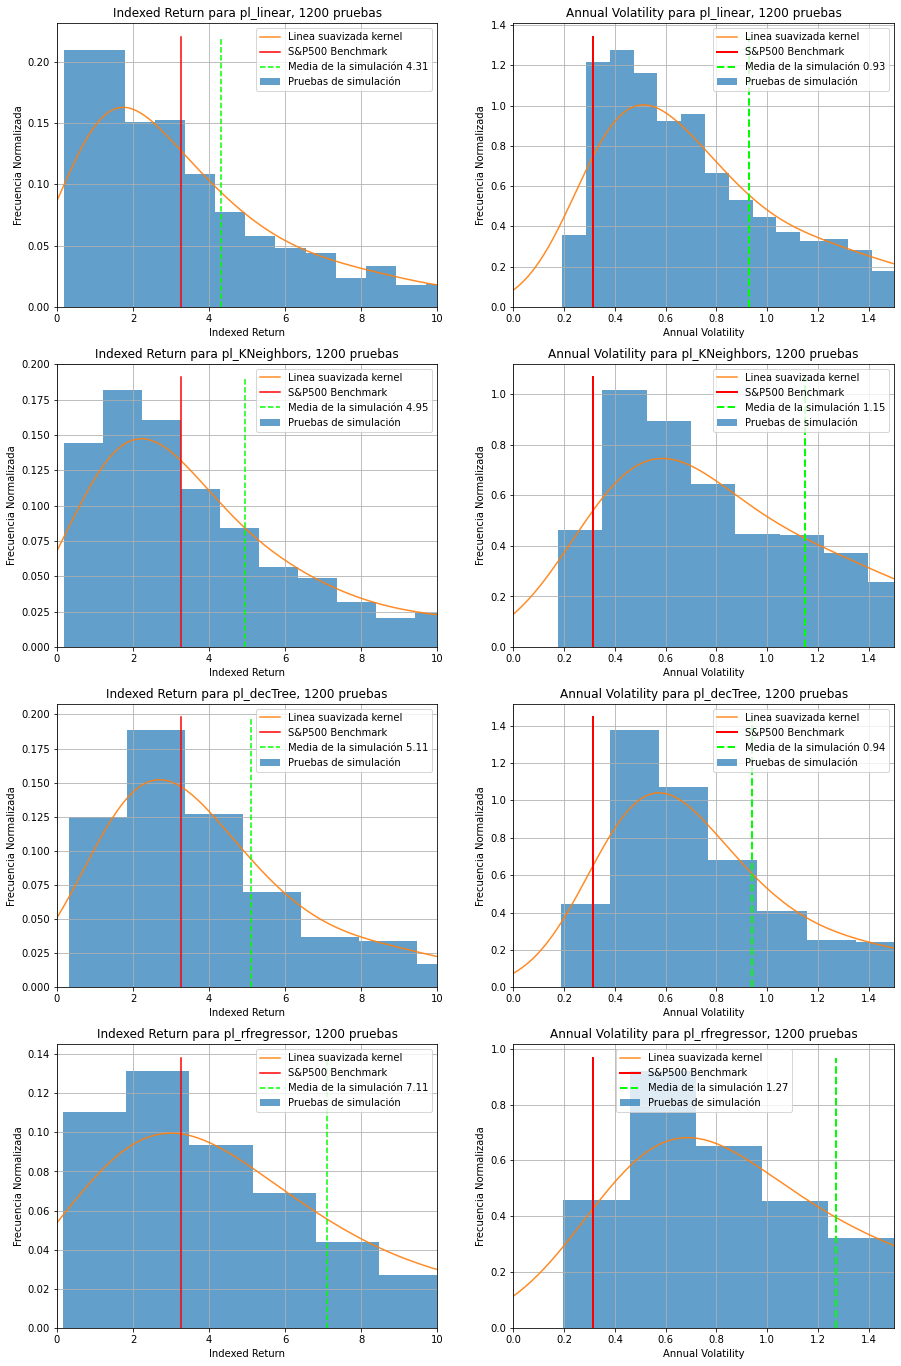

In [32]:
#model_file = ['pl_decTree', 'pl_rfregressor', 'pl_svm', 'pl_KNeighbors', 'pl_GradBregressor']
#model_file = ['pl_decTree', 'pl_rfregressor', 'pl_svm']
model_file = ['pl_linear', 'pl_KNeighbors', 'pl_decTree', 'pl_rfregressor']
numPlots = len(model_file)
plt.figure(figsize=(15,6*numPlots))
for I in range(0, numPlots):
    plt.subplot(numPlots,2,I*2+1)
    plotBacktestDist(results_df, model_file[I], 'Indexed Return')
    plt.subplot(numPlots,2,I*2+2)
    plotBacktestDist(results_df, model_file[I], 'Annual Volatility')

(0.0, 14.0)

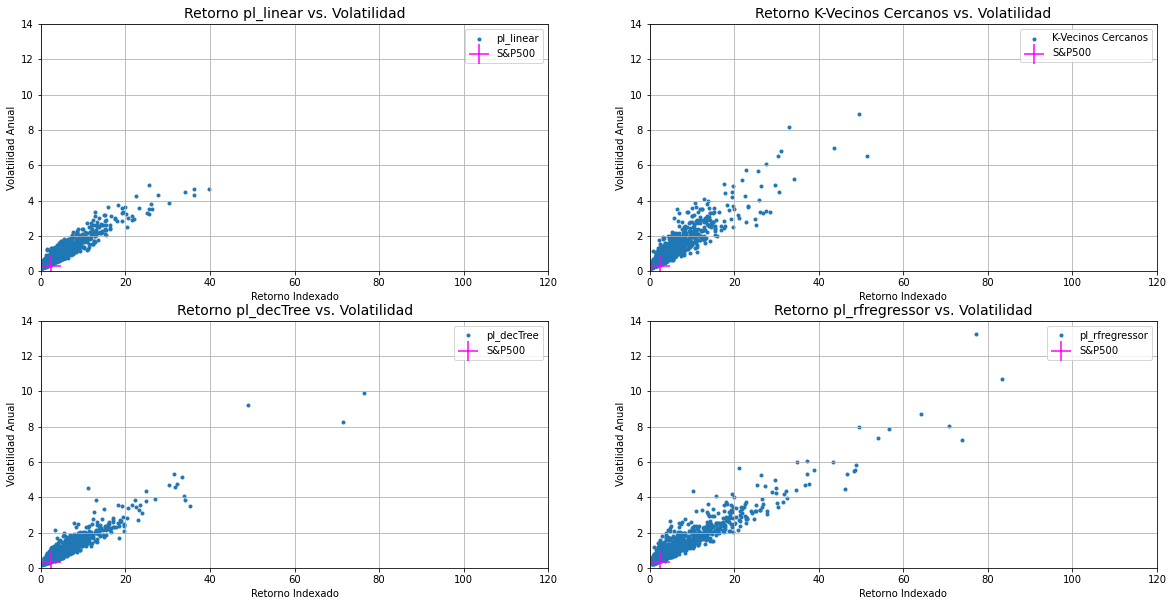

In [33]:
# GRAPH OF RETURN VS VOLATILITY
plt.figure(figsize=(20,10))

ax1 = plt.subplot(2,2,1)
returns = results_df[results_df['Model Used']=='pl_linear']['Indexed Return']
vols = results_df[results_df['Model Used']=='pl_linear']['Annual Volatility']
plt.scatter(returns, vols, marker='.')
plt.scatter(2.340448, 0.309318, marker='+', color='fuchsia', s=400)
plt.xlabel('Retorno Indexado')
plt.ylabel('Volatilidad Anual')
plt.grid()
plt.legend(['pl_linear', 'S&P500'])
plt.title('Retorno pl_linear vs. Volatilidad', fontsize=14)

ax2 = plt.subplot(2,2,2)
returns = results_df[results_df['Model Used']=='pl_KNeighbors']['Indexed Return']
vols = results_df[results_df['Model Used']=='pl_KNeighbors']['Annual Volatility']
plt.scatter(returns, vols, marker='.')
plt.scatter(2.340448, 0.309318, marker='+', color='fuchsia', s=400)
plt.xlabel('Retorno Indexado')
plt.ylabel('Volatilidad Anual')
plt.grid()
plt.legend(['K-Vecinos Cercanos', 'S&P500'])
plt.title('Retorno K-Vecinos Cercanos vs. Volatilidad', fontsize=14)

ax3 = plt.subplot(2,2,3)
returns = results_df[results_df['Model Used']=='pl_decTree']['Indexed Return']
vols = results_df[results_df['Model Used']=='pl_decTree']['Annual Volatility']
plt.scatter(returns, vols, marker='.')
plt.scatter(2.340448, 0.309318, marker='+', color='fuchsia', s=400)
plt.xlabel('Retorno Indexado')
plt.ylabel('Volatilidad Anual')
plt.grid()
plt.legend(['pl_decTree', 'S&P500'])
plt.title('Retorno pl_decTree vs. Volatilidad', fontsize=14)

ax4 = plt.subplot(2,2,4)
returns = results_df[results_df['Model Used']=='pl_rfregressor']['Indexed Return']
vols = results_df[results_df['Model Used']=='pl_rfregressor']['Annual Volatility']
plt.scatter(returns, vols, marker='.')
plt.scatter(2.340448, 0.309318, marker='+', color='fuchsia', s=400)
plt.xlabel('Retorno Indexado')
plt.ylabel('Volatilidad Anual')
plt.grid()
plt.legend(['pl_rfregressor', 'S&P500'])
plt.title('Retorno pl_rfregressor vs. Volatilidad', fontsize=14)

ax1.set_xlim([0, 120])
ax1.set_ylim([0, 14])
ax2.set_xlim([0, 120])
ax2.set_ylim([0, 14])
ax3.set_xlim([0, 120])
ax3.set_ylim([0, 14])
ax4.set_xlim([0, 120])
ax4.set_ylim([0, 14])